#                             CREDIT EDA CASE STUDY 
    
    This case study is all about doing risk analytics in banking and financial services & also 
    how this database can be used to decrease the chances to losing money while giving loan to 
    customers. 
    
    => We have 3 datasets on which we have to do analysis.
    
    1.Application Data - In which we have all the necessary information about new clients.
    
    2.Previous Data - In which we have all details about old customers who have already 
                      taken loan before by the company.
    
    3.Columns Description - In this dataset we have the abbreviation of every column 
                            present in above two datasets, so basically this dataset 
                            is not for analysing but just for understanding the columns.
            
                              Problem Statement - 1
                
    When the client applies for a loan application, the company has to decide for loan approval 
    based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
        
    If the applicant will be ok with repay the loan, then not approving the loan, will give a loss 
    of business to the company.

    If the applicant is not ok with repay the loan,  means client is proved defaulter, then 
    approving the loan can cause to a financial loss for the company.    
    
    When a client applies for a loan,so many kind of decisions that could be taken 
    by the client/company:
        
    1. Approved - Based on given info about client the Company has approved loan Application.
    
    2. Cancelled: The customer cancelled the application during process. Either the client changed                       their mind during process or in some cases due to a higher risk he received worse                     loan interest.

    3. Refused: The loan rejected by the company (because the client does not meet their requirements                 etc).

    4. Unused offer: Loan has been approved but not used by the client or not giving any response to                        the company. 

In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

   # segment 1. application data

In [2]:
#reading the applicatin dataset

app_data = pd.read_csv('application_data.csv')

In [3]:
#checking the dataset

app_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [4]:
#reading column descriptions to understand the columns

cols_desc = pd.read_csv('Copy of columns_description.csv',encoding = 'latin1')

In [5]:
#checking column descriptions

cols_desc.head()

Unnamed: 0             Table  Unnamed: 2                 Row  \
0           1  application_data         NaN          SK_ID_CURR   
1           2  application_data         NaN              TARGET   
2           5  application_data         NaN  NAME_CONTRACT_TYPE   
3           6  application_data         NaN         CODE_GENDER   
4           7  application_data         NaN        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

In [6]:
#display the first 5 records

app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [7]:
# checking the name of columns present in dataset

app_data.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [8]:
#checking the shape of dataframe

app_data.shape

(307511, 122)

In [9]:
#checking the info of dataframe

app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [10]:
#checking null counts in entire dataframe

app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [11]:
#trying fo find percentage of null values present in the dataframe 

null_percent = app_data.isnull().sum()*100/len(app_data)

In [12]:
#checking the columns which have null values more than 40%

highly_missed_cols = null_percent[null_percent>=40]

In [13]:
#display the columns which have null values more than 40%

highly_missed_cols

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [14]:
#checking the count of columns which have null values more than 40%

len(highly_missed_cols)

49

In [15]:
#dropping that columns which have null values more than 40%

new_app_data = app_data.drop(columns=highly_missed_cols.index)

In [16]:
#after dropping cheking the shape of the dataframe

new_app_data.shape

(307511, 73)

In [17]:
#checking the info of the new dataframe 

new_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [18]:
#checking the columns which have null values more than 20%

less_missed_cols = null_percent[(null_percent<20) & (null_percent>0)].sort_values(ascending=False)

In [19]:
#display the column names which have null values more than 20%

less_missed_cols

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

1.We can clearly got that few columns having very less % of null values it won't affect our analysis much so we can impute them with mode or can drop them also.

2.Now coming to that columns where null percentage is between 13 to 19 % ,so we have to deal with it before dealing we have to study about those columns.

In [20]:
# display only those columns which have null values between 13-19%

less_missed_cols[less_missed_cols>13.0]

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
dtype: float64

In [21]:
# let's check the entire dataset for those columns.

new_app_data[less_missed_cols[less_missed_cols>13.0].index]

EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
0           0.139376                         1.0                        0.0   
1                NaN                         0.0                        0.0   
2           0.729567                         0.0                        0.0   
3                NaN                         NaN                        NaN   
4                NaN                         0.0                        0.0   
...              ...                         ...                        ...   
307506           NaN                         NaN                        NaN   
307507           NaN                         NaN                        NaN   
307508      0.218859                         1.0                        0.0   
307509      0.661024                         0.0                        0.0   
307510      0.113922                         1.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             NaN                         NaN   
4                             0.0                         0.0   
...                           ...                         ...   
307506                        NaN                         NaN   
307507                        NaN                         NaN   
307508                        1.0                         0.0   
307509                        0.0                         0.0   
307510                        2.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
0                             0.0                         0.0  
1                             0.0                         0.0  
2                             0.0                         0.0  
3                             NaN                         NaN  
4                             0.0                         0.0  
...                           ...                         ...  
307506                        NaN                         NaN  
307507                        NaN                         NaN  
307508                        0.0                         1.0  
307509                        0.0                         0.0  
307510                        0.0                         0.0  

[307511 rows x 7 columns]

In [22]:
#after dropping that columns, let's cross-verifying

new_app_data[less_missed_cols[less_missed_cols>13.0].index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EXT_SOURCE_3                246546 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 6   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
dtypes: float64(7)
memory usage: 16.4 MB


In [23]:
# checking the no. of unique values presented in that columns

print('yearly unique values:',new_app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].nunique())
print('quarterly unique values:',new_app_data['AMT_REQ_CREDIT_BUREAU_QRT'].nunique())
print('monthly unique values:',new_app_data['AMT_REQ_CREDIT_BUREAU_MON'].nunique())
print('weekly unique values:',new_app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].nunique())
print('daywise unique values:',new_app_data['AMT_REQ_CREDIT_BUREAU_DAY'].nunique())
print('hourly unique values:',new_app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].nunique())

yearly unique values: 25
quarterly unique values: 11
monthly unique values: 24
weekly unique values: 9
daywise unique values: 9
hourly unique values: 5


In [24]:
new_app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [25]:
new_app_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [26]:
new_app_data['AMT_REQ_CREDIT_BUREAU_MON'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [27]:
new_app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [28]:
new_app_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [29]:
new_app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [30]:
#If we want we can impute null values with the mode value in each columns

In [31]:
#checking first 5 rows of the dataset

new_app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 73 columns]

In [32]:
#checking all the columns name

new_app_data.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_

In [33]:
# making a list of columns name which aren't necessary in analysis

non_useable_columns = ['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','FLAG_EMAIL']

In [34]:
# dropping that columns

new_app_data.drop(columns=non_useable_columns,inplace=True)

In [35]:
#checking the shape of dataset after dropping the columns

new_app_data.shape

(307511, 42)

In [36]:
#checking first 5 rows of the dataset

new_app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE  \
0  ...                       2.0                      2.0   
1  ...                       0.0                      1.0   
2  ...                       0.0                      0.0   
3  ...                       0.0                      2.0   
4  ...                       0.0                      0.0   

  DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      2.0                -1134.0                        0.0   
1                      0.0                 -828.0                        0.0   
2                      0.0                 -815.0                        0.0   
3                      0.0                 -617.0                        NaN   
4                      0.0                -1106.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 42 columns]

Now we done with data cleaning ,now we have final dataset for analysis.
let's read the details of the variables,to find insights. 

In [37]:
#checking info 

new_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [38]:
#describing the dataset for checking the distribution of numerical data.

new_app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   0.143421                  1.405292   
std                    0.446698                  2.379803   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   34.000000                344.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
count             306490.000000           307510.000000   
mean                   0.100049             -962.858788   
std                    0.362291              826.808487   
min                    0.000000            -4292.000000   
25%                    0.000000            -1570.000000   
50%                    0.000000             -757.000000   
75%                    0.000000             -274.000000   
max                   24.000000                0.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000            

In [39]:
#checking datatypes

new_app_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
WEEKDAY_APPR_PROCESS_START     object
HOUR_APPR_PROCESS_START         int64
REG_CITY_NOT_LIVE_CITY          int64
REG_CITY_NOT

In [40]:
#display the no. of unique values present in columns

new_app_data.nunique().sort_values(ascending=True)

REG_CITY_NOT_LIVE_CITY             2
TARGET                             2
NAME_CONTRACT_TYPE                 2
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
LIVE_CITY_NOT_WORK_CITY            2
REG_CITY_NOT_WORK_CITY             2
CODE_GENDER                        3
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_HOUSING_TYPE                  6
NAME_FAMILY_STATUS                 6
WEEKDAY_APPR_PROCESS_START         7
NAME_TYPE_SUITE                    7
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_DAY          9
DEF_60_CNT_SOCIAL_CIRCLE           9
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
OCCUPATION_TYPE                   18
AMT_REQ_CREDIT_BUREAU_MON         24
HOUR_APPR_PROCESS_START           24
AMT_REQ_CREDIT_BUREAU_YEAR        25
OBS_30_CNT_SOCIAL_CIRCLE          33
O

In [41]:
# making a list of categorical columns

categorical_columns = ['REG_CITY_NOT_LIVE_CITY', 'TARGET', 'NAME_CONTRACT_TYPE',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_WORK_CITY', 'CODE_GENDER', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS',
       'WEEKDAY_APPR_PROCESS_START', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'HOUR_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'ORGANIZATION_TYPE']

In [42]:
# correcting the datatype of categorical columns

for i in categorical_columns:
    new_app_data[i]=new_app_data[i].astype('category')
    

In [43]:
# I'D provided for customer is unique one so can't do numerical operation there so changing it's datatype into object type.
    
new_app_data['SK_ID_CURR'] = new_app_data['SK_ID_CURR'].astype('object')

In [44]:
#cross_verifying the datatype of columns

new_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

In [45]:
#after correcting datatype let's describe the numeric columns 

new_app_data.describe()

AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05   
mean       1.687979e+05  5.990260e+05   27108.573909     5.383962e+05   
std        2.371231e+05  4.024908e+05   14493.737315     3.694465e+05   
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04   
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05   
50%        1.471500e+05  5.135310e+05   24903.000000     4.500000e+05   
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05   
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  EXT_SOURCE_2   EXT_SOURCE_3  \
count      307511.000000    307511.000000  3.068510e+05  246546.000000   
mean        -4986.120328     -2994.202373  5.143927e-01       0.510853   
std          3522.886321      1509.450419  1.910602e-01       0.194844   
min        -24672.000000     -7197.000000  8.173617e-08       0.000527   
25%         -7479.500000     -4299.000000  3.924574e-01       0.370650   
50%         -4504.000000     -3254.000000  5.659614e-01       0.535276   
75%         -2010.000000     -1720.000000  6.636171e-01       0.669057   
max             0.000000         0.000000  8.549997e-01       0.896010   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean              -962.858788  
std                826.808487  
min              -4292.000000  
25%              -1570.000000  
50%               -757.000000  
75%               -274.000000  
max                  0.000000

In [46]:
#checking shape

new_app_data.shape

(307511, 42)

In [47]:
#display the unique values present in birth column

new_app_data['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [48]:
#display the unique values present in employmed column

new_app_data['DAYS_EMPLOYED']

0           -637
1          -1188
2           -225
3          -3039
4          -3038
           ...  
307506      -236
307507    365243
307508     -7921
307509     -4786
307510     -1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64

In [49]:
#display the unique values present in registration column

new_app_data['DAYS_REGISTRATION']

0        -3648.0
1        -1186.0
2        -4260.0
3        -9833.0
4        -4311.0
           ...  
307506   -8456.0
307507   -4388.0
307508   -6737.0
307509   -2562.0
307510   -5128.0
Name: DAYS_REGISTRATION, Length: 307511, dtype: float64

In [50]:
#display the unique values present in 'id publish' column

new_app_data['DAYS_ID_PUBLISH']

0        -2120
1         -291
2        -2531
3        -2437
4        -3458
          ... 
307506   -1982
307507   -4090
307508   -5150
307509    -931
307510    -410
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: int64

In [51]:
# describing those columns

new_app_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
count  307511.000000  307511.000000      307511.000000    307511.000000
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373
std      4363.988632  141275.766519        3522.886321      1509.450419
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000
max     -7489.000000  365243.000000           0.000000         0.000000

By checking the unique values we can see that these columns contains negative values need to change them

In [52]:
# make a list of those columns 

days_columns = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

In [53]:
#lets change the negative to positive values using abs()

new_app_data[days_columns] = new_app_data[days_columns].abs()

In [54]:
#checking those columns

new_app_data[days_columns]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0             9461            637             3648.0             2120
1            16765           1188             1186.0              291
2            19046            225             4260.0             2531
3            19005           3039             9833.0             2437
4            19932           3038             4311.0             3458
...            ...            ...                ...              ...
307506        9327            236             8456.0             1982
307507       20775         365243             4388.0             4090
307508       14966           7921             6737.0             5150
307509       11961           4786             2562.0              931
307510       16856           1262             5128.0              410

[307511 rows x 4 columns]

In [55]:
#change the days into years

new_app_data[days_columns] = new_app_data[days_columns]/365

In [56]:
#let's check those columns again

new_app_data[days_columns]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0        25.920548       1.745205           9.994521         5.808219
1        45.931507       3.254795           3.249315         0.797260
2        52.180822       0.616438          11.671233         6.934247
3        52.068493       8.326027          26.939726         6.676712
4        54.608219       8.323288          11.810959         9.473973
...            ...            ...                ...              ...
307506   25.553425       0.646575          23.167123         5.430137
307507   56.917808    1000.665753          12.021918        11.205479
307508   41.002740      21.701370          18.457534        14.109589
307509   32.769863      13.112329           7.019178         2.550685
307510   46.180822       3.457534          14.049315         1.123288

[307511 rows x 4 columns]

In [57]:
#checking info again 

new_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

In [58]:
# let's come to the gender part

new_app_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [59]:
# here i can see that we have 4 'XNA' values so assumping that these are missing values so we can impute them by mode value

new_app_data['CODE_GENDER'].replace('XNA','F',inplace=True)

In [60]:
# cross verifying the value_counts

new_app_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [61]:
# let's come to the income part

In [62]:
# checking the highest income

new_app_data['AMT_INCOME_TOTAL'].max()

117000000.0

In [63]:
# describing the income column

new_app_data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [64]:
# let's come to the credit part

In [65]:
# checking the highest credit 

new_app_data['AMT_CREDIT'].max()

4050000.0

In [66]:
#describing the income column

new_app_data['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [67]:
#here we can observe that mean is more than maximum so it's hard to determine both columns so binning that columns in certain ranges 

bins=[0,100000,250000,500000,750000,1000000, 1250000, 1500000, 1750000, 2000000, 2250000,2500000,
        2750000,3000000,3250000,3500000,3750000,4000000,4250000,4500000,4750000,5000000,150000000]

ranges=['0-100000','100000-250000','250000-500000','500000-750000','750000-1000000', '1000000-1250000',
          '1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000',
          '2500000-2750000','2750000-3000000','3000000-3250000','3250000-3500000','3500000-3750000',
          '3750000-4000000','4000000-4250000','4250000-4500000','4500000-4750000','4750000-5000000',
          '5000000 and above']
new_app_data['AMT_INC_RANGE'] = pd.cut(new_app_data['AMT_INCOME_TOTAL'],bins,labels=ranges)
new_app_data['AMT_CDT_RANGE'] = pd.cut(new_app_data['AMT_CREDIT'],bins,labels=ranges)

In [68]:
#checking ranges of income

new_app_data['AMT_INC_RANGE']

0         100000-250000
1         250000-500000
2              0-100000
3         100000-250000
4         100000-250000
              ...      
307506    100000-250000
307507         0-100000
307508    100000-250000
307509    100000-250000
307510    100000-250000
Name: AMT_INC_RANGE, Length: 307511, dtype: category
Categories (22, object): ['0-100000' < '100000-250000' < '250000-500000' < '500000-750000' ... '4250000-4500000' < '4500000-4750000' < '4750000-5000000' < '5000000 and above']

In [69]:
#checking ranges of credit

new_app_data['AMT_CDT_RANGE']

0           250000-500000
1         1250000-1500000
2           100000-250000
3           250000-500000
4           500000-750000
               ...       
307506      250000-500000
307507      250000-500000
307508      500000-750000
307509      250000-500000
307510      500000-750000
Name: AMT_CDT_RANGE, Length: 307511, dtype: category
Categories (22, object): ['0-100000' < '100000-250000' < '250000-500000' < '500000-750000' ... '4250000-4500000' < '4500000-4750000' < '4750000-5000000' < '5000000 and above']

In [70]:
#describing the income ranges

new_app_data[['AMT_INC_RANGE']].describe()

AMT_INC_RANGE
count          307511
unique             19
top     100000-250000
freq           204035

In [71]:
#describing the credit ranges

new_app_data[['AMT_CDT_RANGE']].describe()

AMT_CDT_RANGE
count          307511
unique             18
top     250000-500000
freq            90135

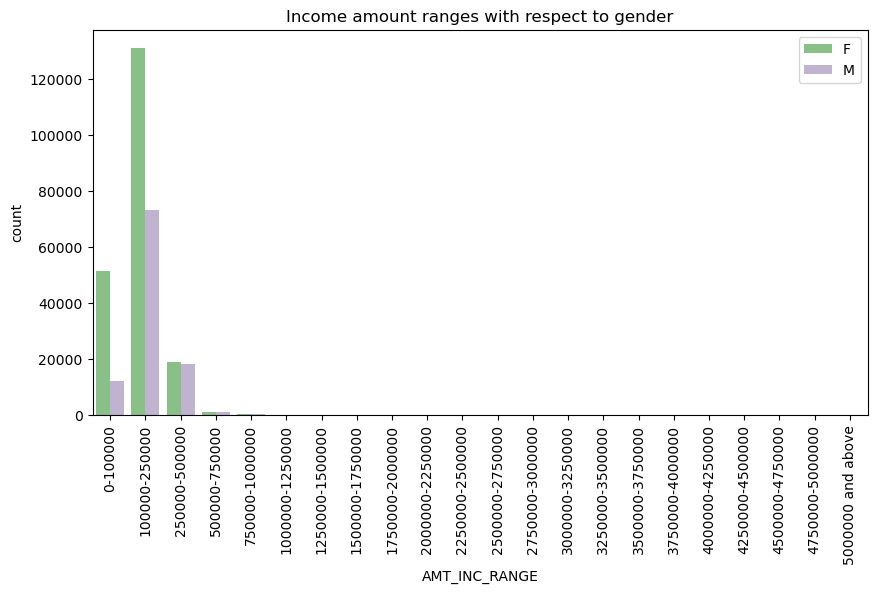

In [72]:
#let's do plotting to get insights from amount_income

plt.figure(figsize=[10,5])
sns.countplot(data=new_app_data,x='AMT_INC_RANGE',hue='CODE_GENDER',palette='Accent')
plt.title('Income amount ranges with respect to gender',size=12)
plt.xticks(rotation=90)
plt.legend(loc= 'upper right')
plt.show()

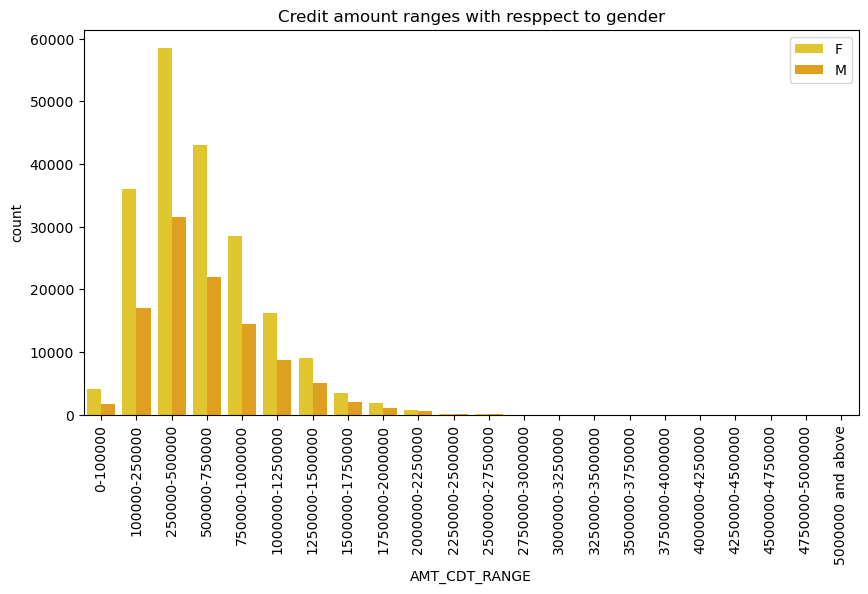

In [73]:
#plotting in credit amount 

plt.figure(figsize=[10,5])
sns.countplot(data=new_app_data,x='AMT_CDT_RANGE',hue='CODE_GENDER',palette='Wistia')
plt.title('Credit amount ranges with resppect to gender',size=12)
plt.xticks(rotation=90)
plt.legend(loc= 'upper right')
plt.show()

In [74]:
#let's describe again to find the outliers

new_app_data.describe()

AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05   
mean       1.687979e+05  5.990260e+05   27108.573909     5.383962e+05   
std        2.371231e+05  4.024908e+05   14493.737315     3.694465e+05   
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04   
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05   
50%        1.471500e+05  5.135310e+05   24903.000000     4.500000e+05   
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05   
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868      43.936973     185.547239   
std                      0.013831      11.956133     382.037676   
min                      0.000290      20.517808       0.000000   
25%                      0.010006      34.008219       2.556164   
50%                      0.018850      43.150685       6.079452   
75%                      0.028663      53.923288      15.635616   
max                      0.072508      69.120548    1000.665753   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  EXT_SOURCE_2   EXT_SOURCE_3  \
count      307511.000000    307511.000000  3.068510e+05  246546.000000   
mean           13.660604         8.203294  5.143927e-01       0.510853   
std             9.651743         4.135481  1.910602e-01       0.194844   
min             0.000000         0.000000  8.173617e-08       0.000527   
25%             5.506849         4.712329  3.924574e-01       0.370650   
50%            12.339726         8.915068  5.659614e-01       0.535276   
75%            20.491781        11.778082  6.636171e-01       0.669057   
max            67.594521        19.717808  8.549997e-01       0.896010   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean              -962.858788  
std                826.808487  
min              -4292.000000  
25%              -1570.000000  
50%               -757.000000  
75%               -274.000000  
max                  0.000000

In [75]:
#As we can see many columns have outliers so let's make boxplot to find them 

In [76]:
# based on total income & credit will try to fing insights

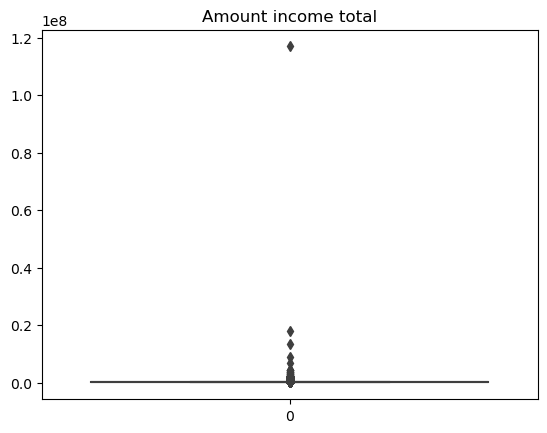

In [77]:
#plotting on 'AMT_INCOME_TOTAL'

plt.title('Amount income total',size=12)
sns.boxplot(new_app_data['AMT_INCOME_TOTAL']);

In [78]:
# as we can see that only one or two records of income are very higher so it can be real income we should not drop that 

In [79]:
#As we can tell that maximum income can be outlier so....

new_app_data[new_app_data['AMT_INCOME_TOTAL']==new_app_data['AMT_INCOME_TOTAL'].max()]

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840     114967      1         Cash loans           F            N   

      FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
12840               Y            1       117000000.0    562491.0      26194.5   

       ...  DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE  \
12840  ...                       0.0                    0.0   

      AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
12840                        0.0                       0.0   

      AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
12840                        0.0                       0.0   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
12840                        0.0                         1.0   

           AMT_INC_RANGE  AMT_CDT_RANGE  
12840  5000000 and above  500000-750000  

[1 rows x 44 columns]

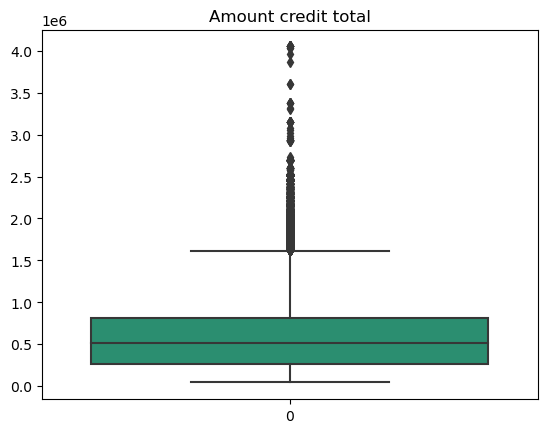

In [80]:
#plotting on 'AMT_CREDIT'

plt.title('Amount credit total',size=12)
sns.boxplot(new_app_data['AMT_CREDIT'],palette='Dark2');

In [81]:
# let's check in how many cases credit is more than income total 

new_app_data[new_app_data['AMT_CREDIT']>new_app_data['AMT_INCOME_TOTAL']]

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0          100002      1         Cash loans           M            N   
1          100003      0         Cash loans           F            N   
2          100004      0    Revolving loans           M            Y   
3          100006      0         Cash loans           F            N   
4          100007      0         Cash loans           M            N   
...           ...    ...                ...         ...          ...   
307506     456251      0         Cash loans           M            N   
307507     456252      0         Cash loans           F            N   
307508     456253      0         Cash loans           F            N   
307509     456254      1         Cash loans           F            N   
307510     456255      0         Cash loans           F            N   

       FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y            0          202500.0    406597.5   
1                    N            0          270000.0   1293502.5   
2                    Y            0           67500.0    135000.0   
3                    Y            0          135000.0    312682.5   
4                    Y            0          121500.0    513000.0   
...                ...          ...               ...         ...   
307506               N            0          157500.0    254700.0   
307507               Y            0           72000.0    269550.0   
307508               Y            0          153000.0    677664.0   
307509               Y            0          171000.0    370107.0   
307510               N            0          157500.0    675000.0   

        AMT_ANNUITY  ...  DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE  \
0           24700.5  ...                       2.0                -1134.0   
1           35698.5  ...                       0.0                 -828.0   
2            6750.0  ...                       0.0                 -815.0   
3           29686.5  ...                       0.0                 -617.0   
4           21865.5  ...                       0.0                -1106.0   
...             ...  ...                       ...                    ...   
307506      27558.0  ...                       0.0                 -273.0   
307507      12001.5  ...                       0.0                    0.0   
307508      29979.0  ...                       0.0                -1909.0   
307509      20205.0  ...                       0.0                 -322.0   
307510      49117.5  ...                       0.0                 -787.0   

       AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                             0.0                       0.0   
1                             0.0                       0.0   
2                             0.0                       0.0   
3                             NaN                       NaN   
4                             0.0                       0.0   
...                           ...                       ...   
307506                        NaN                       NaN   
307507                        NaN                       NaN   
307508                        1.0                       0.0   
307509                        0.0                       0.0   
307510                        0.0                       0.0   

       AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                             0.0                       0.0   
1                             0.0                       0.0   
2                             0.0                       0.0   
3                             NaN                       NaN   
4                             0.0                       0.0   
...                           ...                       ...   
307506                        NaN                       NaN   
307507                        NaN                       NaN   
307508                        0.0                       1.0   
3

In [82]:
# almost in 80% cases credit is more than income 

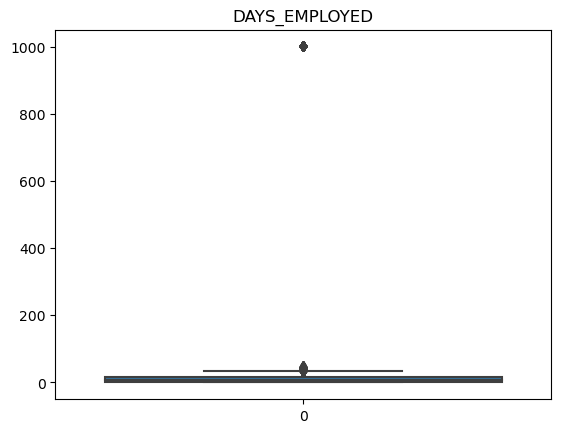

In [83]:
#plotting on 'DAYS_EMPLOYED'

plt.title('DAYS_EMPLOYED',size=12)
sns.boxplot(new_app_data['DAYS_EMPLOYED']);

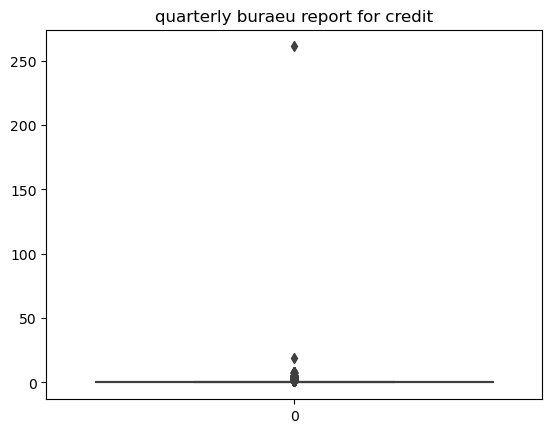

In [84]:
#plotting in quarterly buraeu report for credit

plt.title('quarterly buraeu report for credit',size=12)
sns.boxplot(new_app_data['AMT_REQ_CREDIT_BUREAU_QRT']);

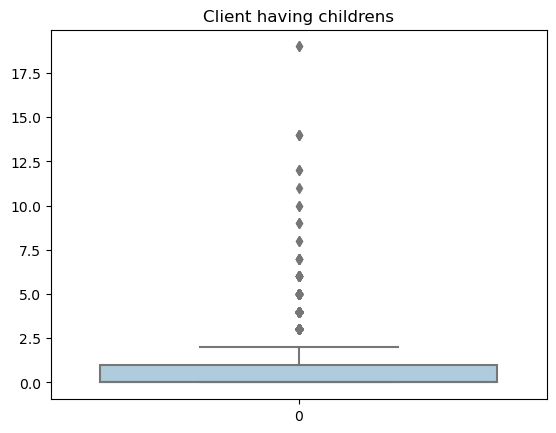

In [85]:
#As we can see that client children's column have an outlier

plt.title('Client having childrens',size=12)
sns.boxplot(new_app_data['CNT_CHILDREN'],palette="Paired");

In [86]:
#which has value 19 what is generally not possible to have 19 kids, SO WE CAN DROP THAT OUTLIER 

In [87]:
#We have target column on the basis of that we have to do analysis so just plot a graph to get insights

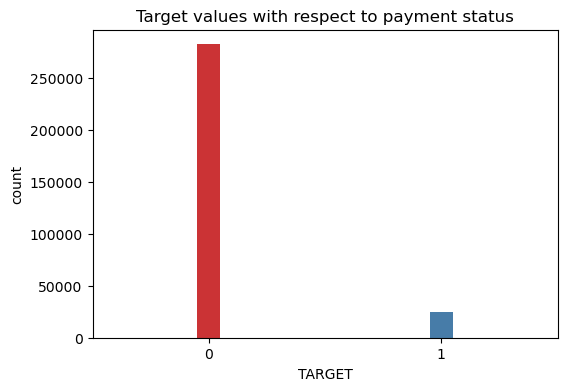

In [88]:
#plotting in target column 


plt.figure(figsize=(6,4))
plt.title('Target values with respect to payment status')
sns.countplot(x=new_app_data['TARGET'],width=0.1,palette="Set1");

In [89]:
#As we can see the clear difference between target values 

In [90]:
# let just check the value counts

new_app_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [91]:
#find percentage of values

new_app_data['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [92]:
#On the basis of target we will analyse the dataset so now we will devide the dataset in two parts 

In [93]:
# First dataset which has target 0 details

target_0= new_app_data[new_app_data['TARGET']==0]


In [94]:
#display the first 5 records

target_0.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1     100003      0         Cash loans           F            N   
2     100004      0    Revolving loans           M            Y   
3     100006      0         Cash loans           F            N   
4     100007      0         Cash loans           M            N   
5     100008      0         Cash loans           M            N   

  FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N            0          270000.0   1293502.5      35698.5   
2               Y            0           67500.0    135000.0       6750.0   
3               Y            0          135000.0    312682.5      29686.5   
4               Y            0          121500.0    513000.0      21865.5   
5               Y            0           99000.0    490495.5      27517.5   

   ...  DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE  \
1  ...                       0.0                 -828.0   
2  ...                       0.0                 -815.0   
3  ...                       0.0                 -617.0   
4  ...                       0.0                -1106.0   
5  ...                       0.0                -2536.0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_INC_RANGE  \
1                        0.0                         0.0  250000-500000   
2                        0.0                         0.0       0-100000   
3                        NaN                         NaN  100000-250000   
4                        0.0                         0.0  100000-250000   
5                        1.0                         1.0       0-100000   

     AMT_CDT_RANGE  
1  1250000-1500000  
2    100000-250000  
3    250000-500000  
4    500000-750000  
5    250000-500000  

[5 rows x 44 columns]

In [95]:
# checking the shape

target_0.shape

(282686, 44)

In [96]:
# Second dataset which has target 1 details

target_1= new_app_data[new_app_data['TARGET']==1]

In [97]:
#display the first 5 records

target_1.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002      1         Cash loans           M            N   
26     100031      1         Cash loans           F            N   
40     100047      1         Cash loans           M            N   
42     100049      1         Cash loans           F            N   
81     100096      1         Cash loans           F            N   

   FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y            0          202500.0    406597.5      24700.5   
26               Y            0          112500.0    979992.0      27076.5   
40               Y            0          202500.0   1193580.0      35028.0   
42               N            0          135000.0    288873.0      16258.5   
81               Y            0           81000.0    252000.0      14593.5   

    ...  DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE  \
0   ...                       2.0                -1134.0   
26  ...                       0.0                 -161.0   
40  ...                       0.0                -1075.0   
42  ...                       0.0                -1480.0   
81  ...                       1.0                    0.0   

   AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                       0.0   
26                        0.0                       0.0   
40                        0.0                       0.0   
42                        0.0                       0.0   
81                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                       0.0   
26                        0.0                       0.0   
40                        0.0                       2.0   
42                        0.0                       0.0   
81                        0.0                       0.0   

    AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_INC_RANGE  \
0                         0.0                         1.0  100000-250000   
26                        2.0                         2.0  100000-250000   
40                        0.0                         4.0  100000-250000   
42                        0.0                         2.0  100000-250000   
81                        0.0                         0.0       0-100000   

      AMT_CDT_RANGE  
0     250000-500000  
26   750000-1000000  
40  1000000-1250000  
42    250000-500000  
81    250000-500000  

[5 rows x 44 columns]

In [98]:
# checking the shape

target_1.shape

(24825, 44)

In [99]:
# trying to find the ratio of these two datasets 

ratio = len(target_0)/len(target_1)

In [100]:
ratio

11.387150050352467

In [101]:
#As we know that target 0 indicates that customer don't have payment difficulties n target 1 indicates that customer have payment difficulties so We will plot a heatmap to find the correlation between these two datasets so that we can get better result over it 

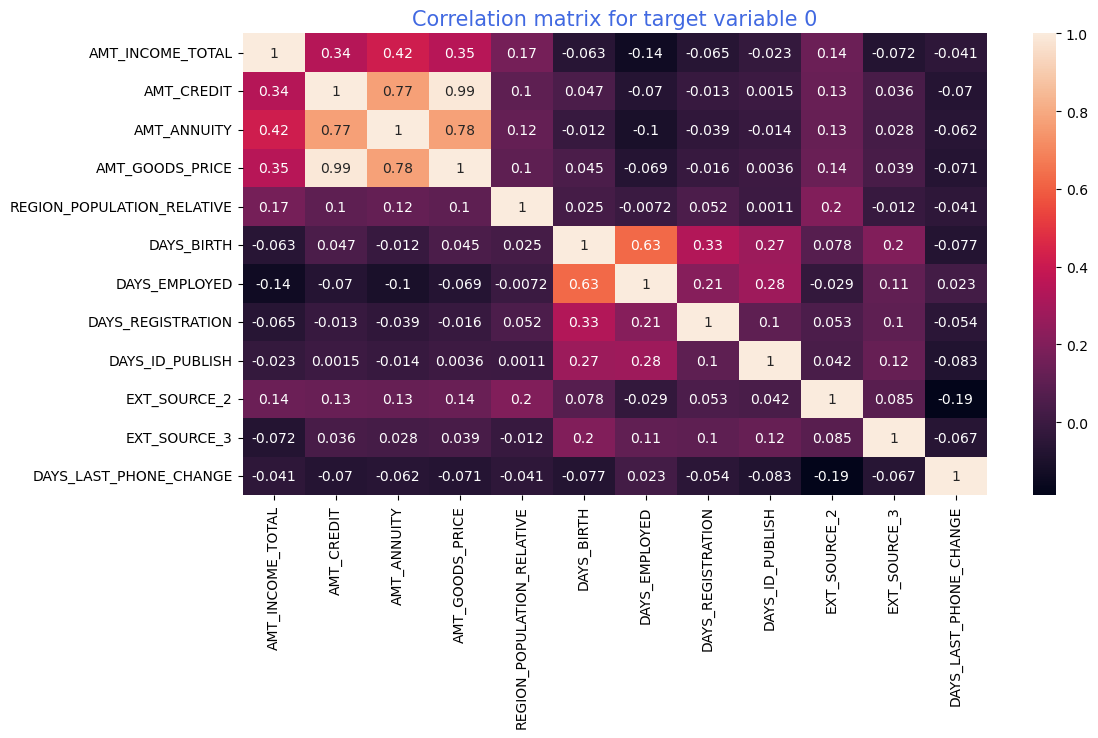

In [102]:
# plotting a heatmap with target 0

plt.figure(figsize=(12,6))
plt.title('Correlation matrix for target variable 0',size=15,color='royalblue')
sns.heatmap(target_0.corr(),annot=True);

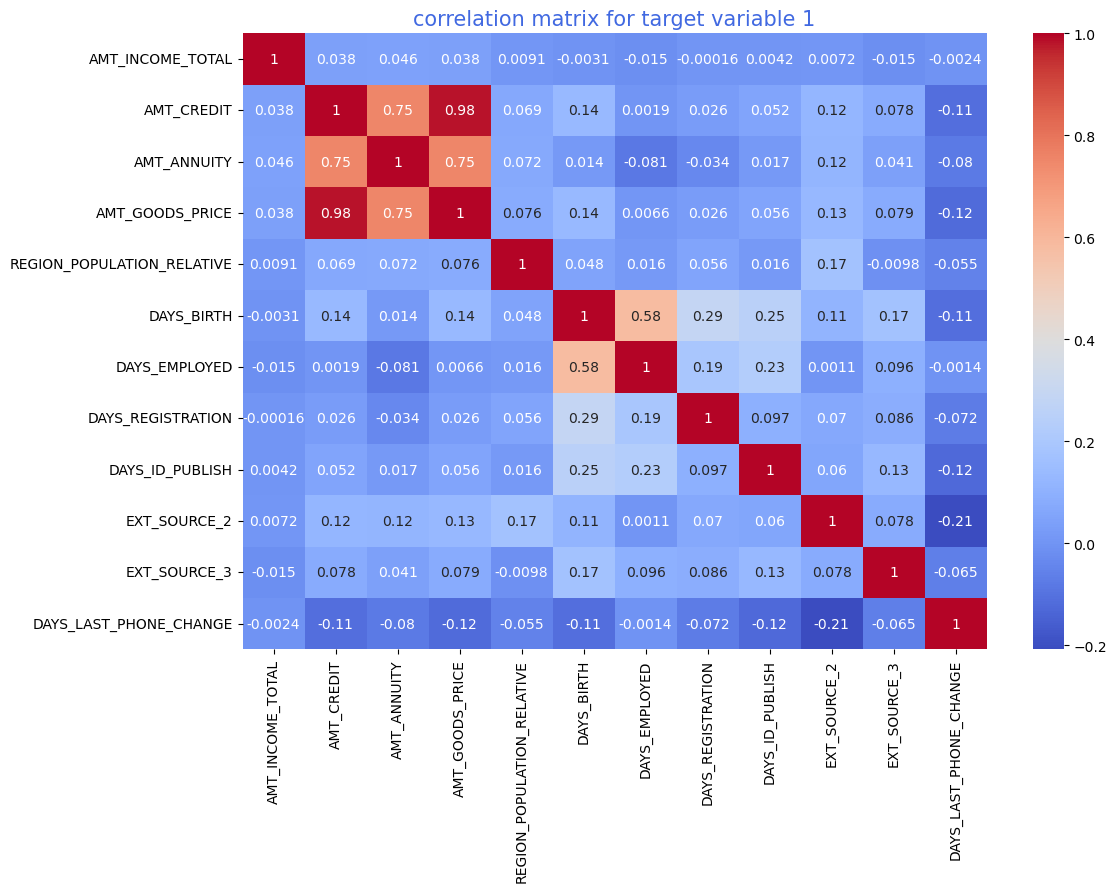

In [103]:
# plotting a heatmap with target 1

plt.figure(figsize=(12,8))
plt.title('correlation matrix for target variable 1',size=15,color='royalblue')
sns.heatmap(target_1.corr(),annot=True,cmap='coolwarm');

In [104]:
#By this correlation matrix we can get the insight that correlation between these two datasets are almost same for variables 

In [105]:
#let's start with univariate analysis

In [106]:
# first will go for numerical analysis
# let just check info of dataset


In [107]:
new_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

In [108]:
# go for univariate analysis

In [109]:
#plotting graphs for numerical columns.

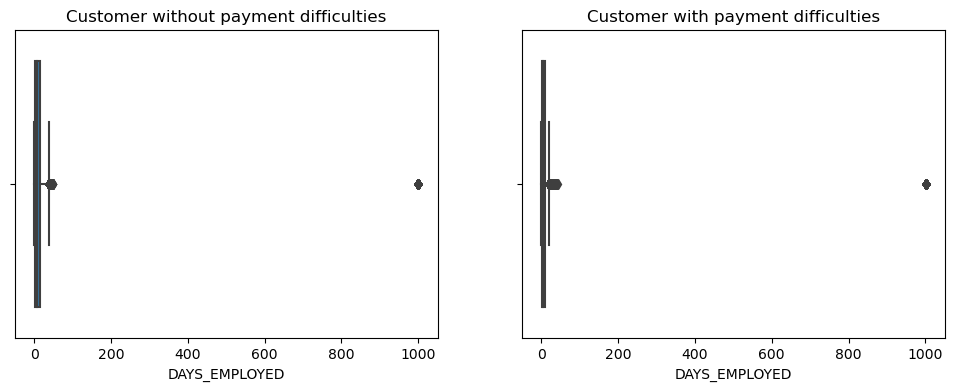

In [110]:
# plotting a boxplot for "days_employed" column

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=target_0['DAYS_EMPLOYED'])
plt.title('Customer without payment difficulties',size=12)
plt.subplot(1,2,2)
sns.boxplot(x=target_1['DAYS_EMPLOYED'])
plt.title('Customer with payment difficulties',size=12)
plt.show()

In [111]:
#Here we can observe that one outlier which have value around 1000 which is normally not possible so will analyse without outlier

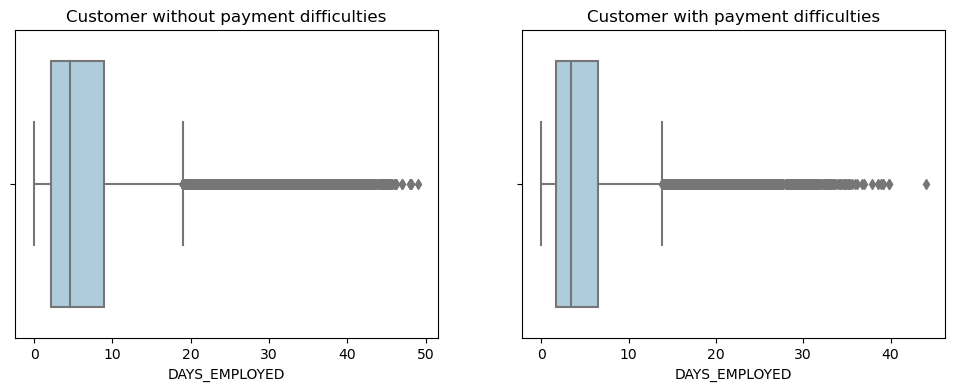

In [112]:
#plotting with condition 

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=target_0[target_0['DAYS_EMPLOYED']<1000]['DAYS_EMPLOYED'],palette="Paired")
plt.title('Customer without payment difficulties',size=12)
plt.subplot(1,2,2)
sns.boxplot(x=target_1[target_1['DAYS_EMPLOYED']<1000]['DAYS_EMPLOYED'],palette="Paired")
plt.title('Customer with payment difficulties',size=12)
plt.show()

In [113]:
#by that box plot we can get the point that customer without payment difficulties having years_employed in between 2-10 years ,
#And coustomer with payment difficulties having in between 2-8 years.

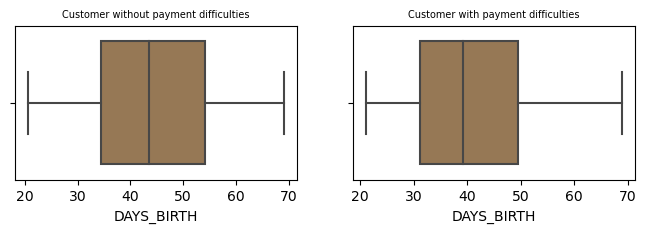

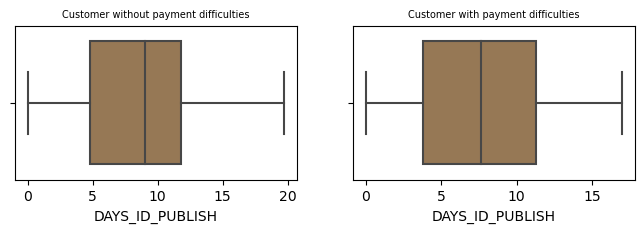

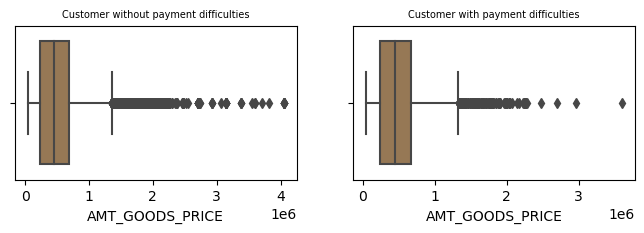

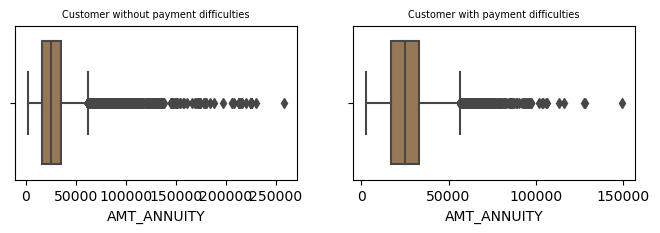

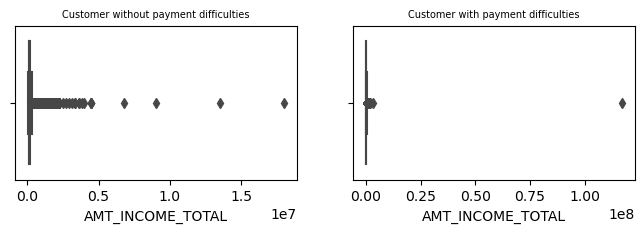

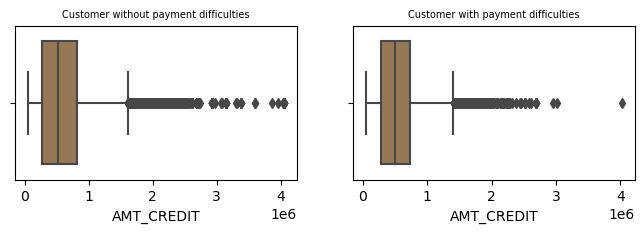

In [114]:
# just make a list of numerical column presented in the dataset

cols=['DAYS_BIRTH','DAYS_ID_PUBLISH','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT']

for i in cols:
    plt.figure(figsize=(8,2))
    plt.subplot(1,2,1)
    sns.boxplot(x=target_0[i],palette="cubehelix")
    plt.title('Customer without payment difficulties',size=7)
    plt.subplot(1,2,2)
    sns.boxplot(x=target_1[i],palette="cubehelix")
    plt.title('Customer with payment difficulties',size=7)
    plt.show()

-----> insights we get from above boxplots.

1.From that box plot we can observe that customer without payment difficulties having year in between 34-54 years ,
  And coustomer with payment difficulties having in between 31-50 years.

2.It shows that value lies between 5-12 for target 0 & 3-11 for target 1.

3.It's almost same for both target values

4.From that we can note that customer without payment difficulties having AMT_ANNUITY in between 20000-30000,
  And coustomer with payment difficulties having AMT_ANNUITY in between 20000-30000 years.

5.We have a lot of outliers in income column. 


In [115]:
# now will do univariate analysis in categorical variables 

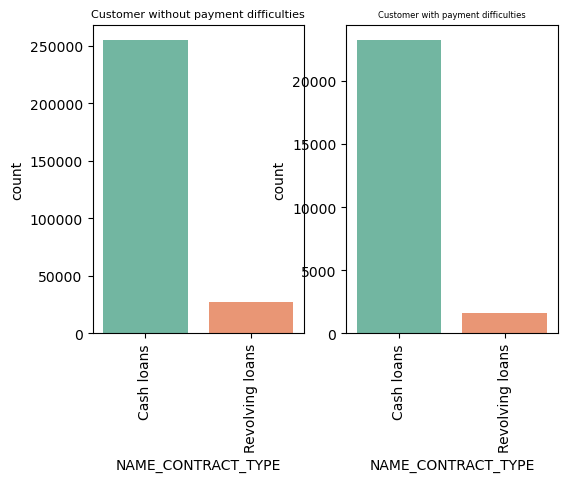

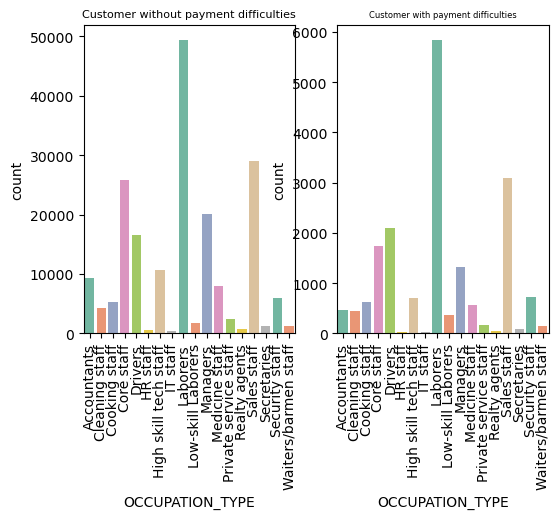

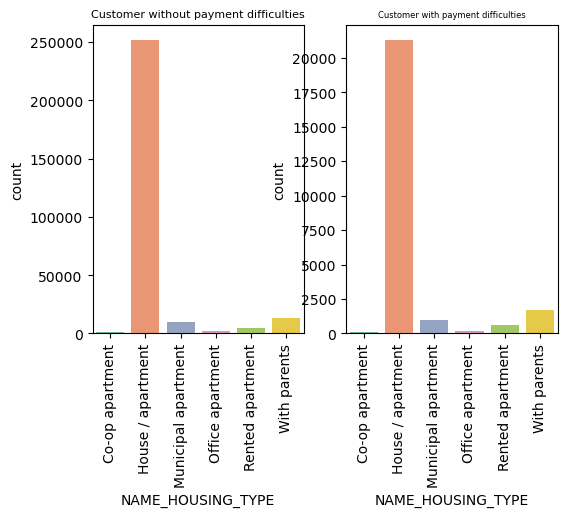

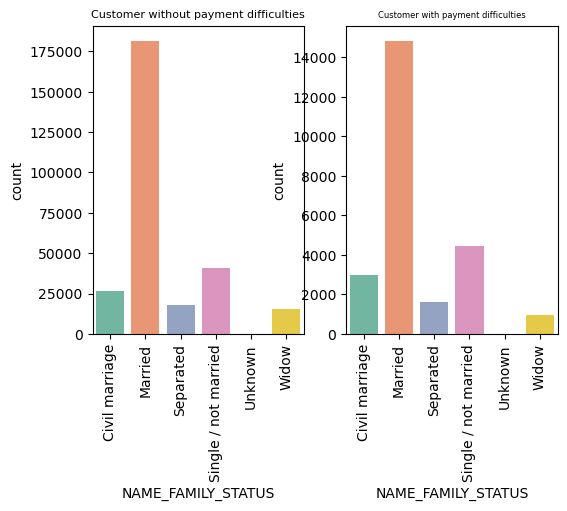

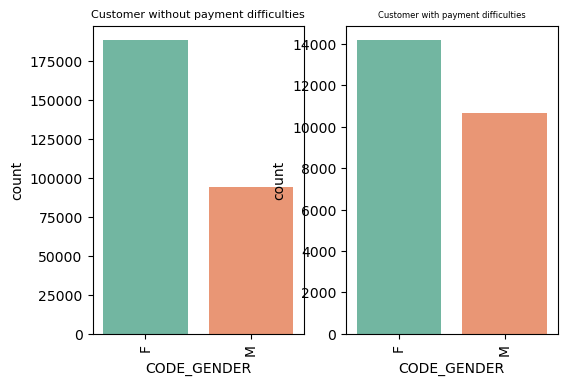

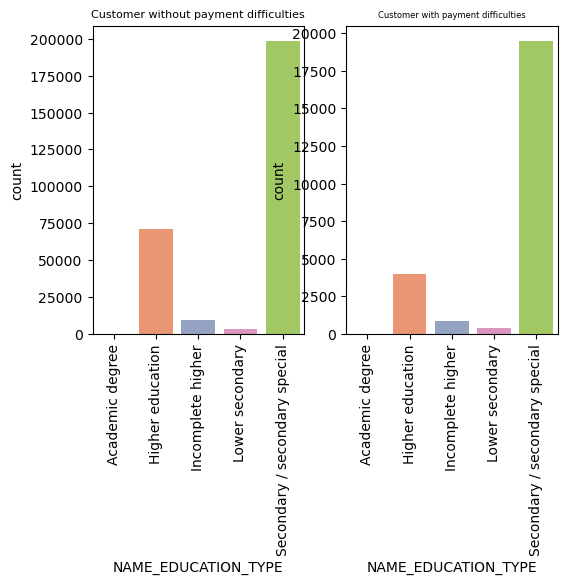

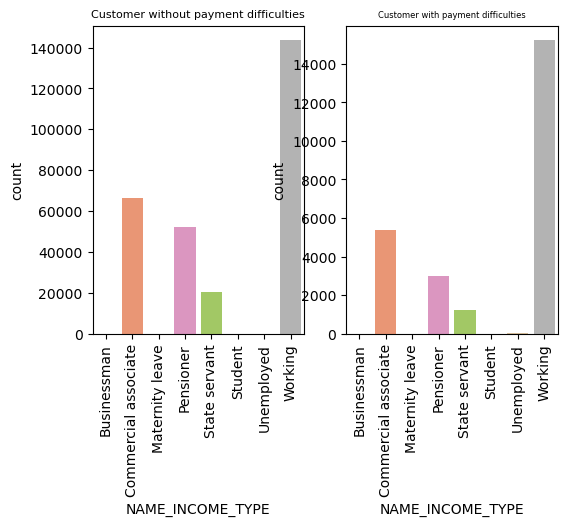

In [116]:
# just make a list of categorical column presented in the dataset

cols=['NAME_CONTRACT_TYPE','OCCUPATION_TYPE','NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_INCOME_TYPE']

for i in cols:
    plt.figure(figsize=(6,4))
    plt.subplot(1,2,1)
    sns.countplot(x=target_0[i],palette = "Set2")
    plt.title('Customer without payment difficulties',size=8)
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.countplot(x=target_1[i],palette = "Set2")
    plt.title('Customer with payment difficulties',size=6)
    plt.xticks(rotation=90)
    plt.show()

-----> insights we get from above counter plots.

1.We can see that customer without payment difficulties and customer with payment difficulties are taking cash loans

2.Here we can observe that labourers are taking more loan in both datasets

3.Here, we can observe that House/Apartment category are more in number in both cases

4.Here wecan say that people who are married taking more loan in both cases.

5.Here we can observe that people who are in secondary class taking more loan in both cases

6.Here we can conclude that male candidates have facing more payment difficulties as compare to female candidates

7.People who ar working taking more loan in both datsets 

In [117]:
#let's come to the bivariate analysis

In [118]:
#categorical - categorical bivariate analysis

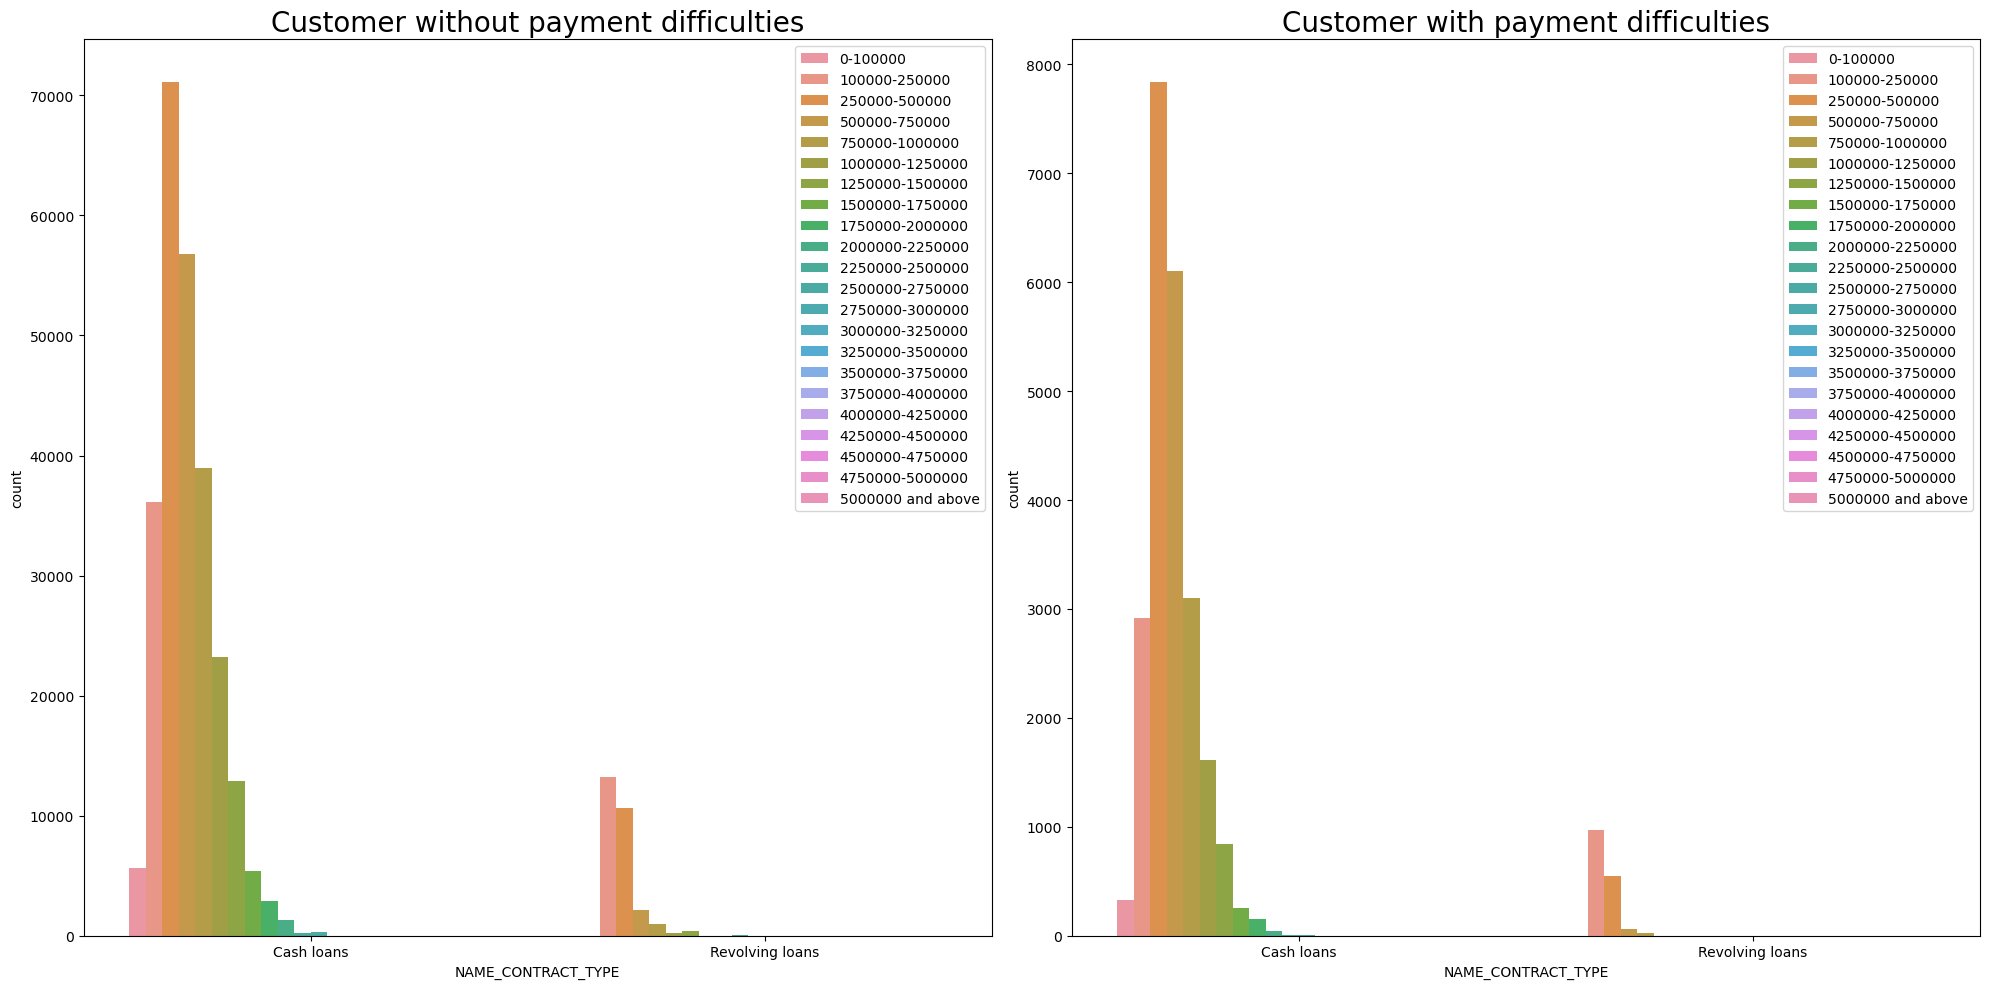

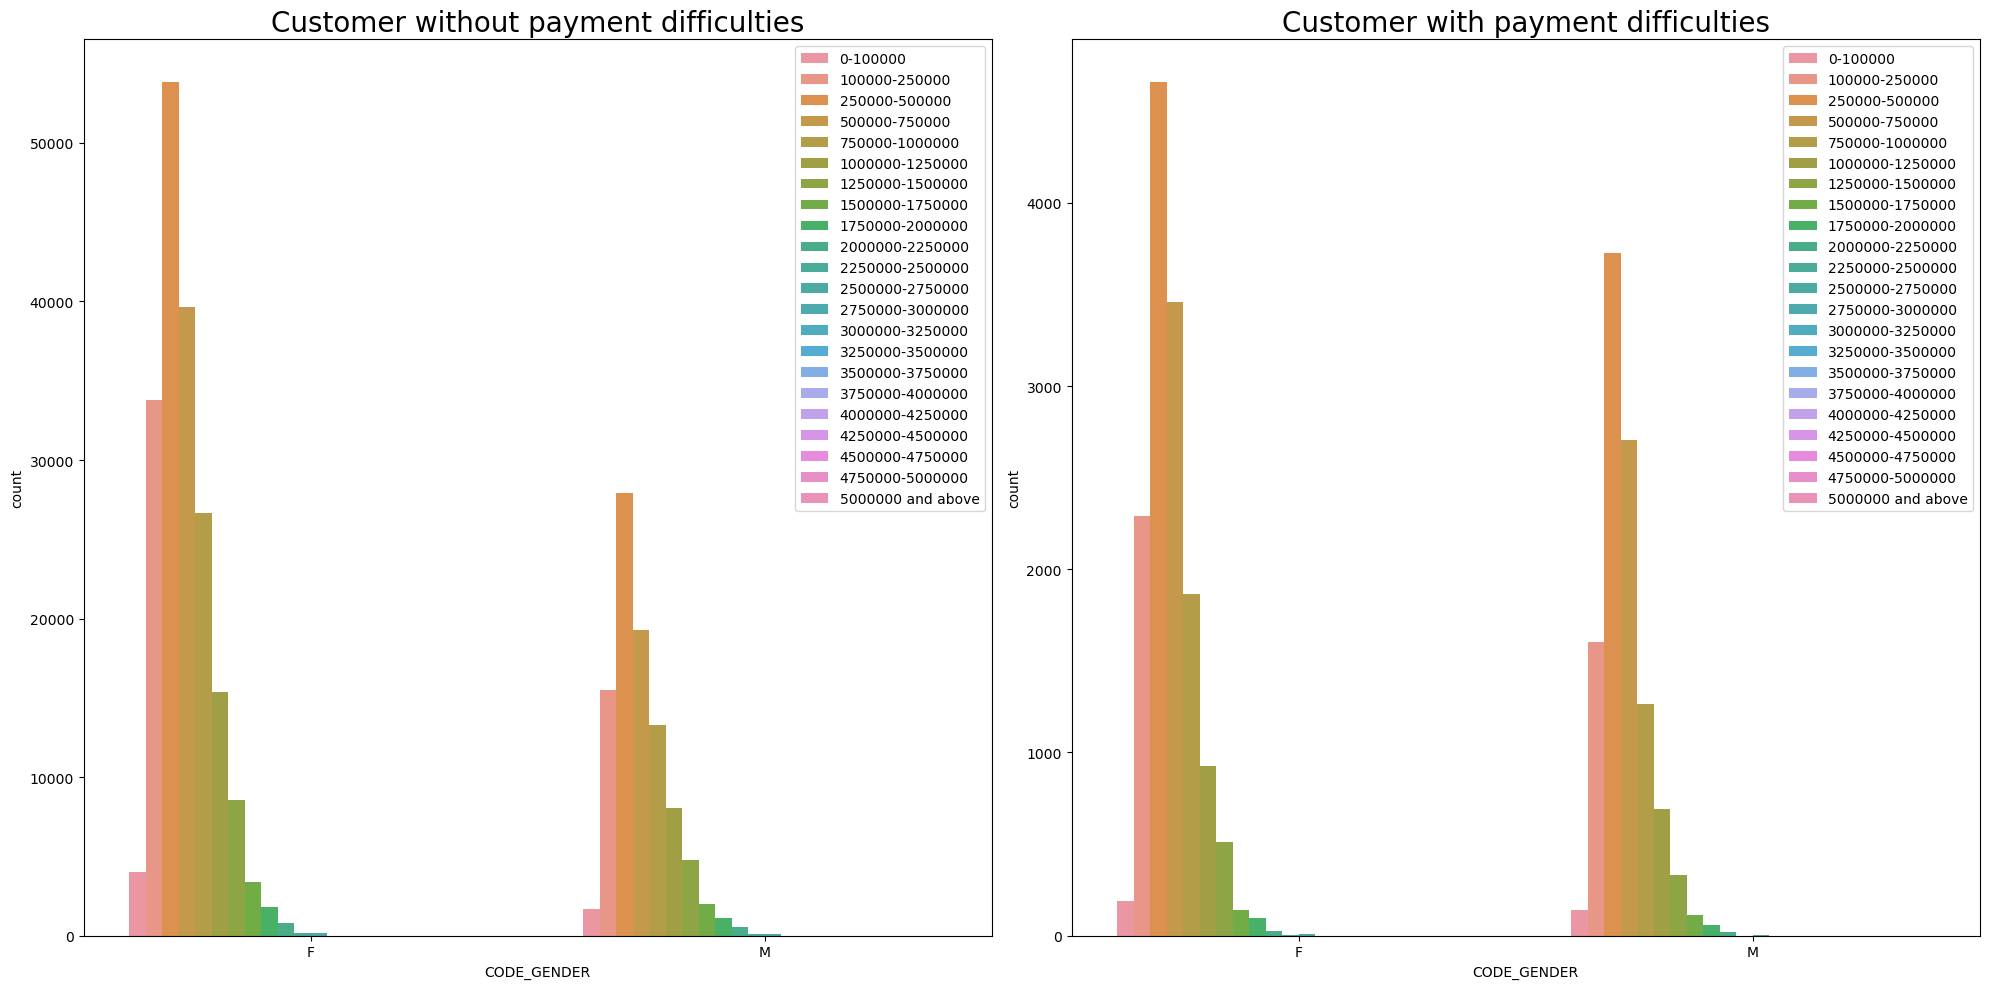

In [119]:
# we will do analysis with respect to 'AMT_CDT_RANGE'

# just make a list of categorical column presented in the dataset

cols =['NAME_CONTRACT_TYPE','CODE_GENDER']

for i in cols:
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    sns.countplot(data=target_0,x=i,hue='AMT_CDT_RANGE')
    plt.title('Customer without payment difficulties',size=20)
    plt.legend(loc='upper right')
    plt.subplot(1,2,2)
    sns.countplot(data=target_1,x=i,hue='AMT_CDT_RANGE')
    plt.title('Customer with payment difficulties',size=20)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


-----> insights we get from above counter plots.

1. Observed that,most of the people taking cash loans and people without facing payment diffuclties have revovling loans more than other case

2. Here we observed that females are taking more loans and have almost equal in both cases (facing difficulties & not facing difficulties)

In [120]:
#Numerical-Numerical bivariate analysis

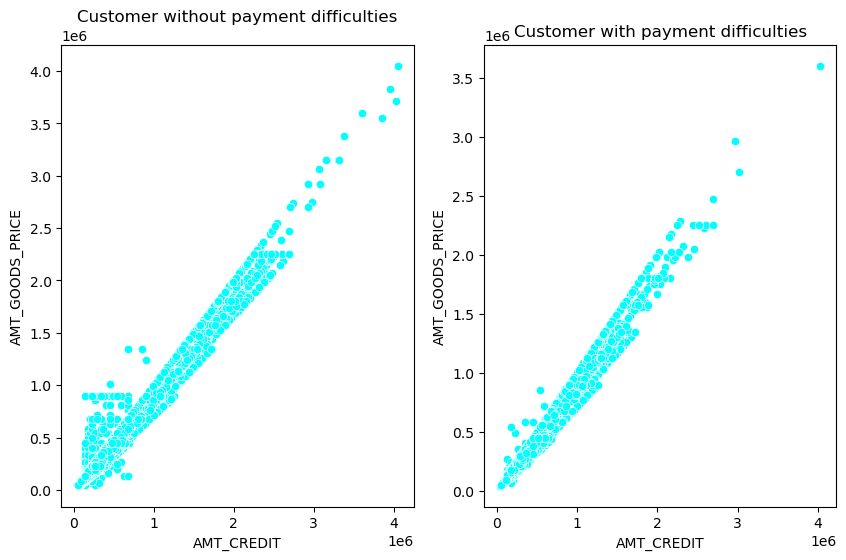

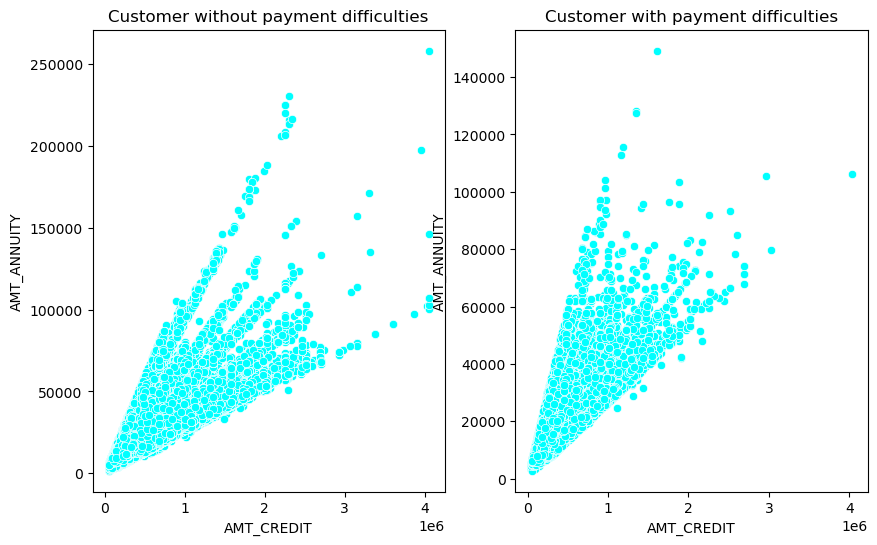

In [121]:
# we will do analysis with respect to 'AMT_CREDIT'

# just make a list of categorical column presented in the dataset

cols = ['AMT_GOODS_PRICE','AMT_ANNUITY']

for i in cols:
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.scatterplot(data=target_0,x='AMT_CREDIT',y=i,color='cyan')
    plt.title('Customer without payment difficulties')
    plt.subplot(1,2,2)
    sns.scatterplot(data=target_1,x='AMT_CREDIT',y=i,color='cyan')
    plt.title('Customer with payment difficulties')
    plt.show()


----> insights we get from above scatter plots.

1. Both variables are ppositively correlated with each other

2. Here we seen that people without paymnt difficulties have taken more credit 

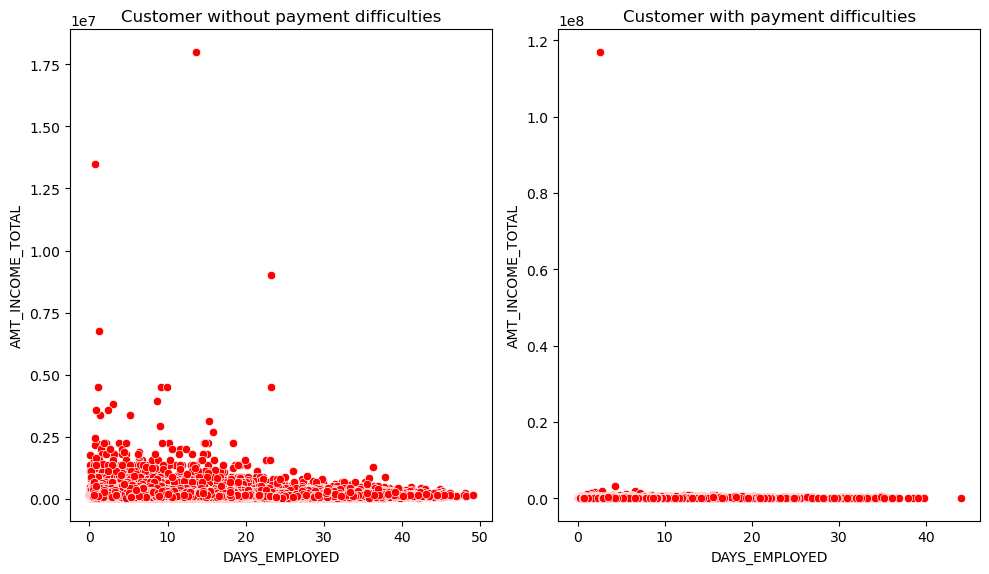

In [122]:
#bivariate analysis on 'DAYS_EMPLOYED' and 'AMT_INCOME_TOTAL'

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(data=target_0[target_0['DAYS_EMPLOYED']<1000],x='DAYS_EMPLOYED',y='AMT_INCOME_TOTAL',color='red')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.scatterplot(data=target_1[target_1['DAYS_EMPLOYED']<1000],x='DAYS_EMPLOYED',y='AMT_INCOME_TOTAL',color='red')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.show()

In [123]:
# Here we got the point which is the measure issue nowadays people who have more working experience they also getting less income and customers who have payment difficulties not getting much salary according to their work years 

In [124]:
#numerical - categorical bivariate analysis

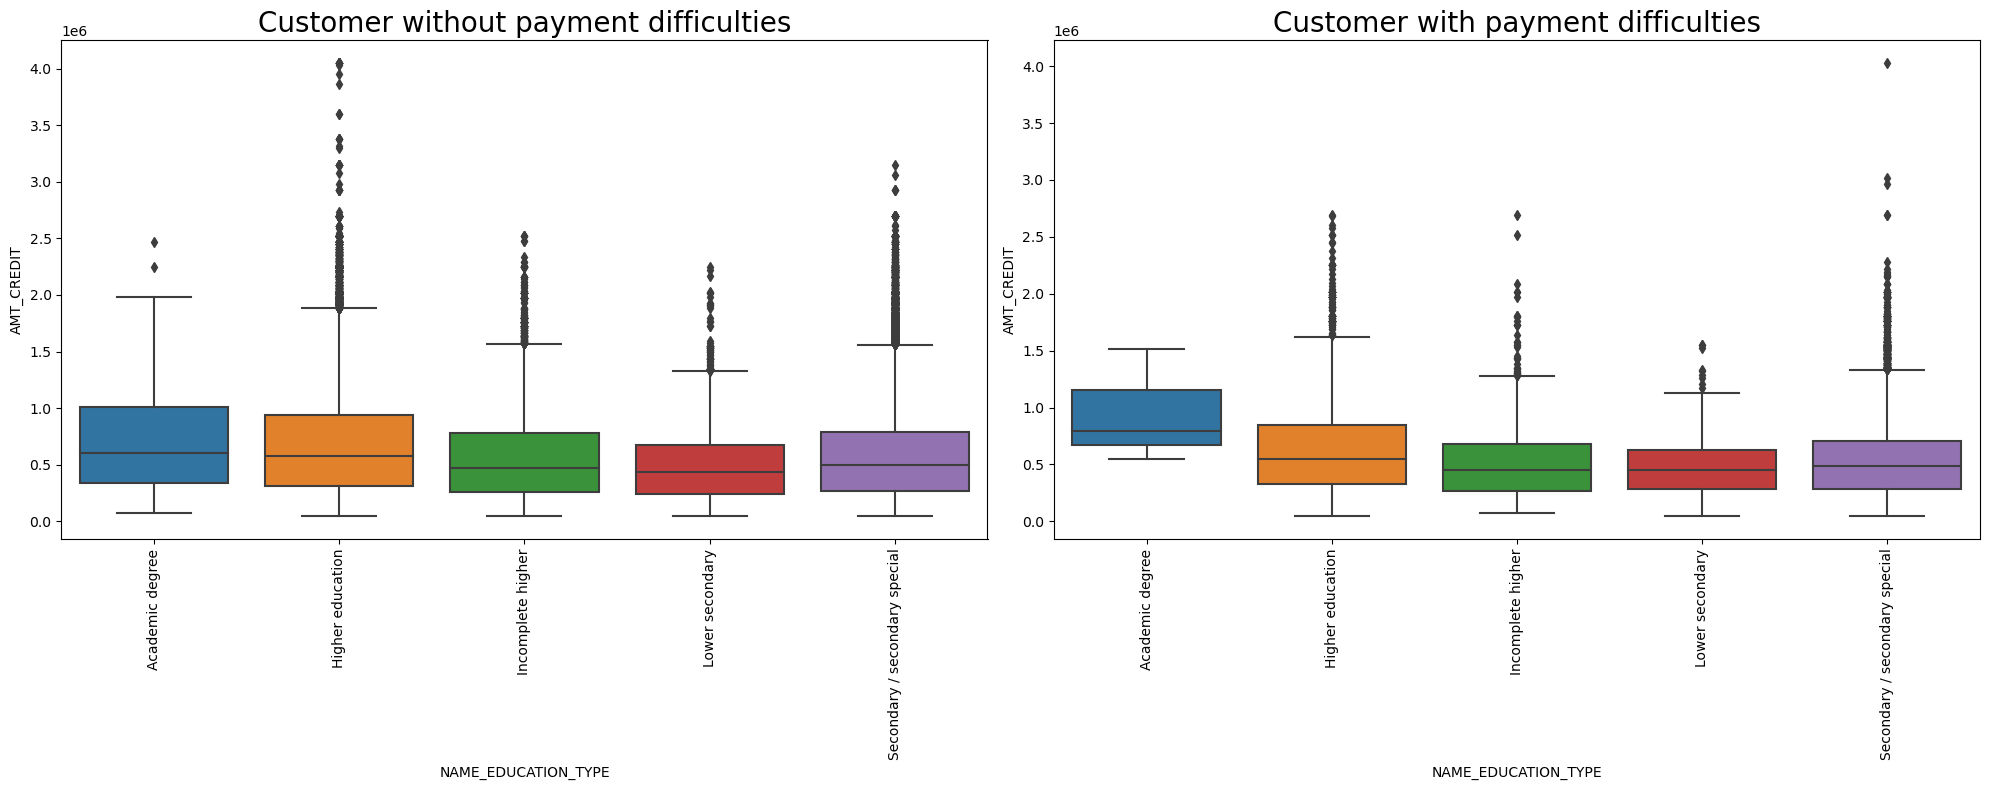

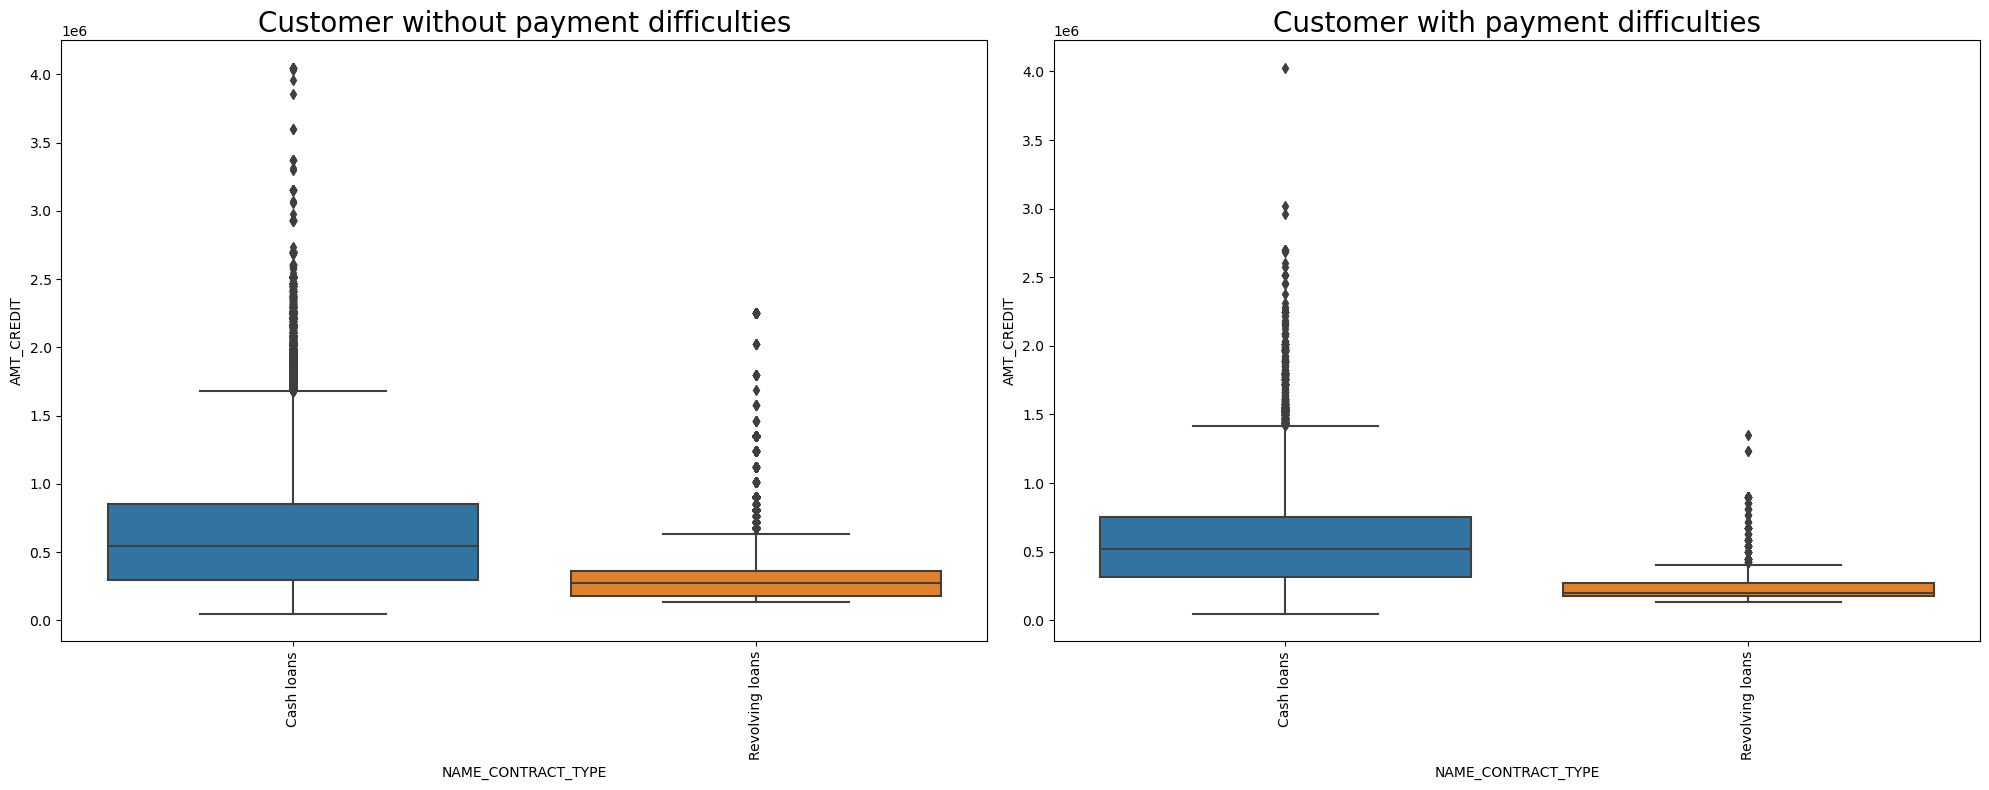

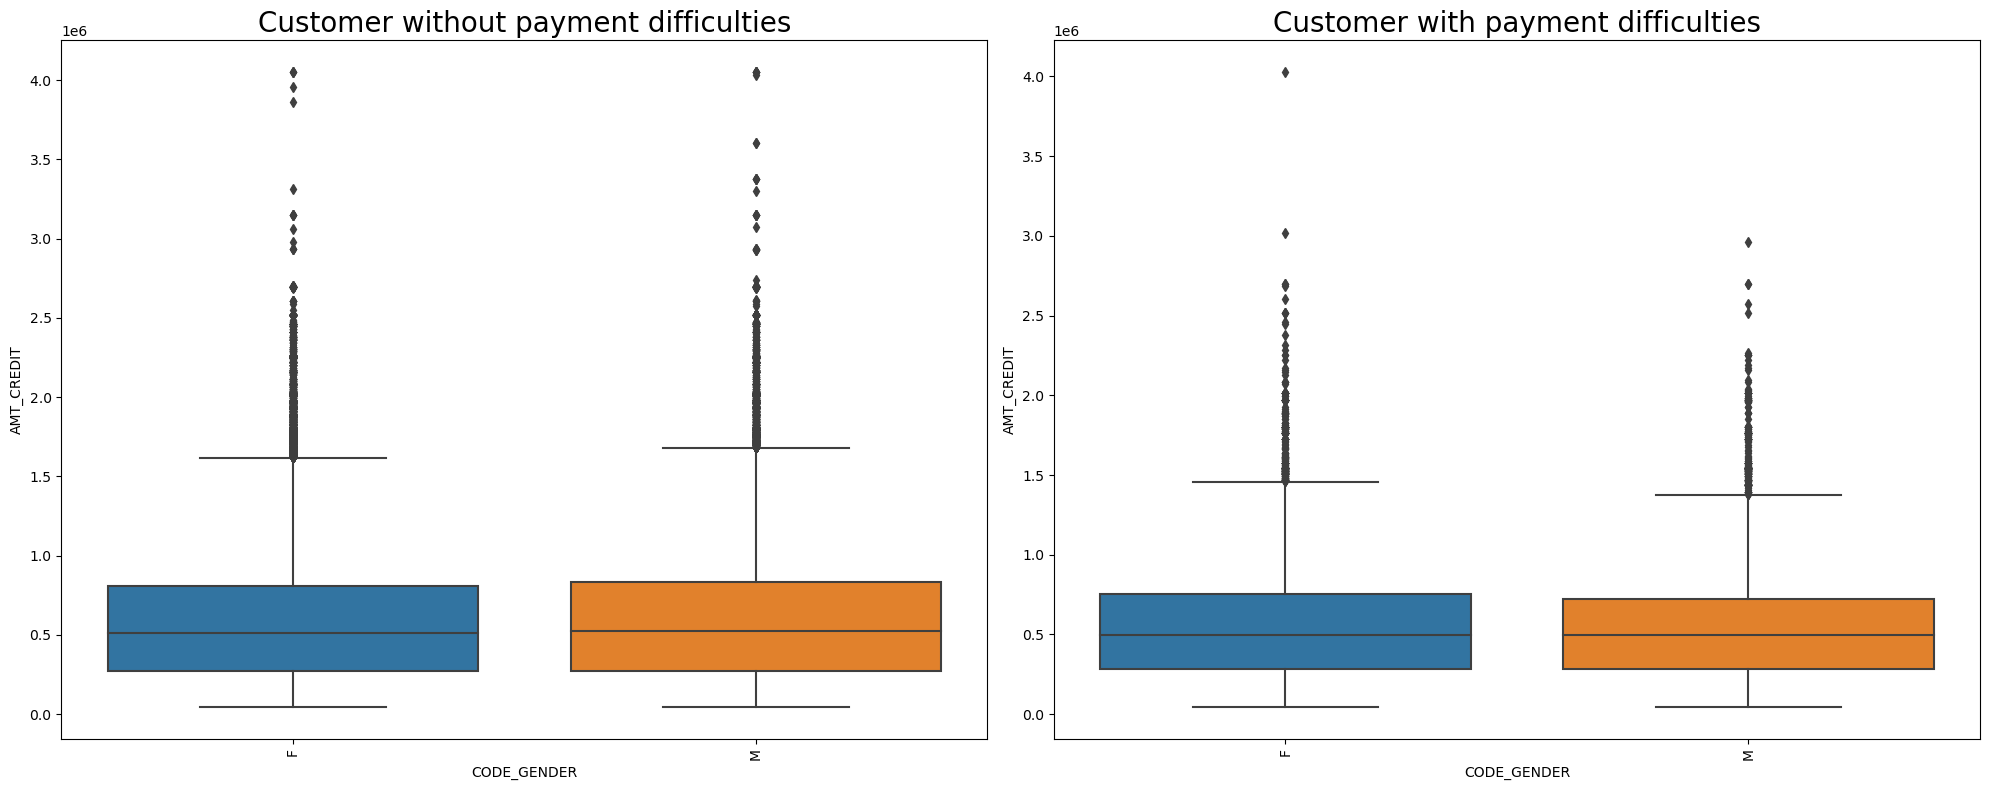

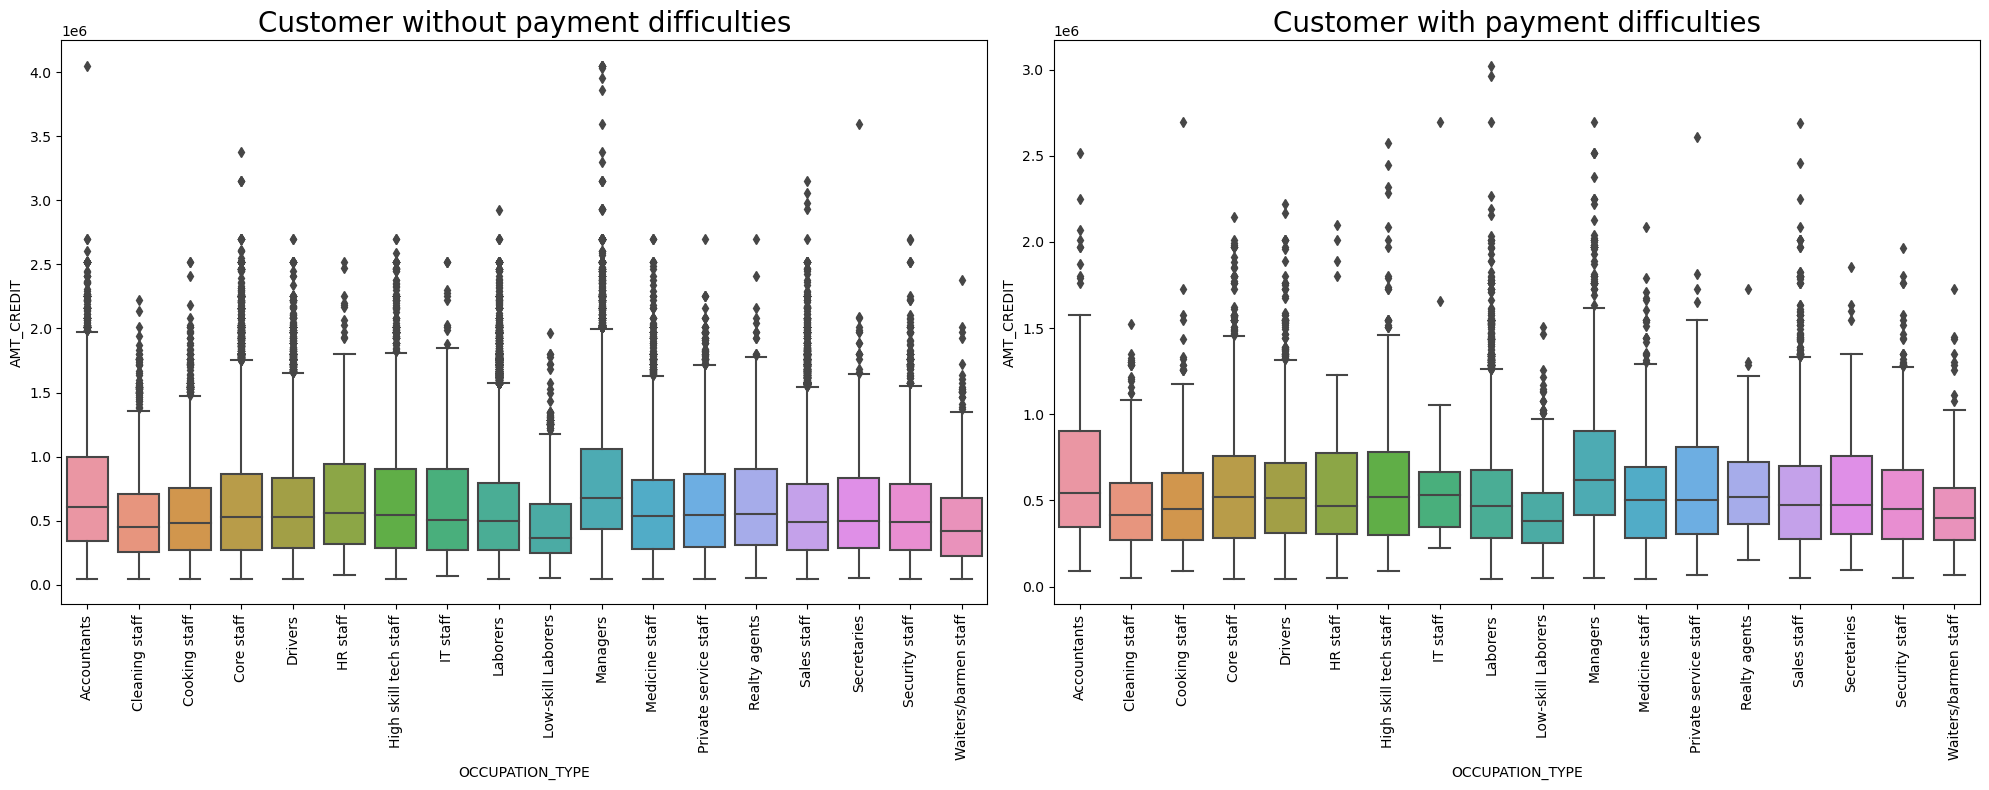

In [125]:
#bivariate analysis with respect to AMT_CREDIT 

cols=['NAME_EDUCATION_TYPE','NAME_CONTRACT_TYPE','CODE_GENDER','OCCUPATION_TYPE']

for i in cols:
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    sns.boxplot(data=target_0,y='AMT_CREDIT',x=i)
    plt.title('Customer without payment difficulties',size=20)
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.boxplot(data=target_1,y='AMT_CREDIT',x=i)
    plt.title('Customer with payment difficulties',size=20)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

-----> insights we get from above counter plots.

1. people who have academic degree facing more difficulties about payment 

2. customers who taken cash loan facing more payment difficulties

3. Got the point that it's not depending on gender to make payment

4. Observed that in every occupation they are facing payment difficulties as compare to without     
   payment difficulty and labourers are facing more payment difficulty ,managers are having without 
   payment difficulty

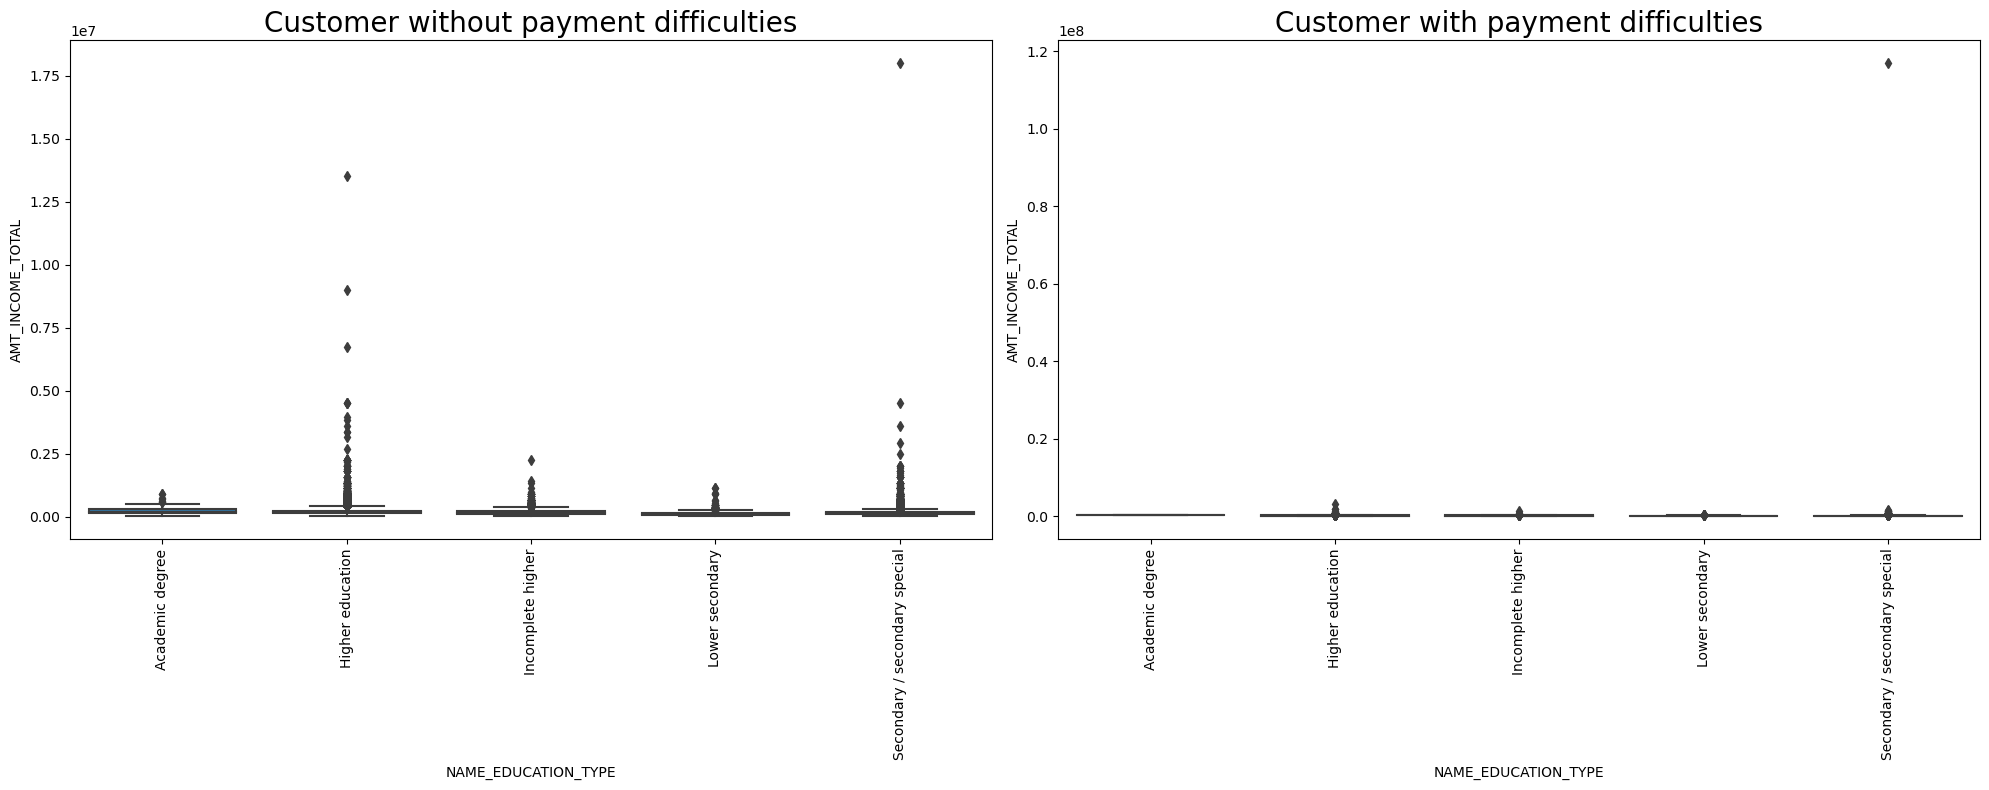

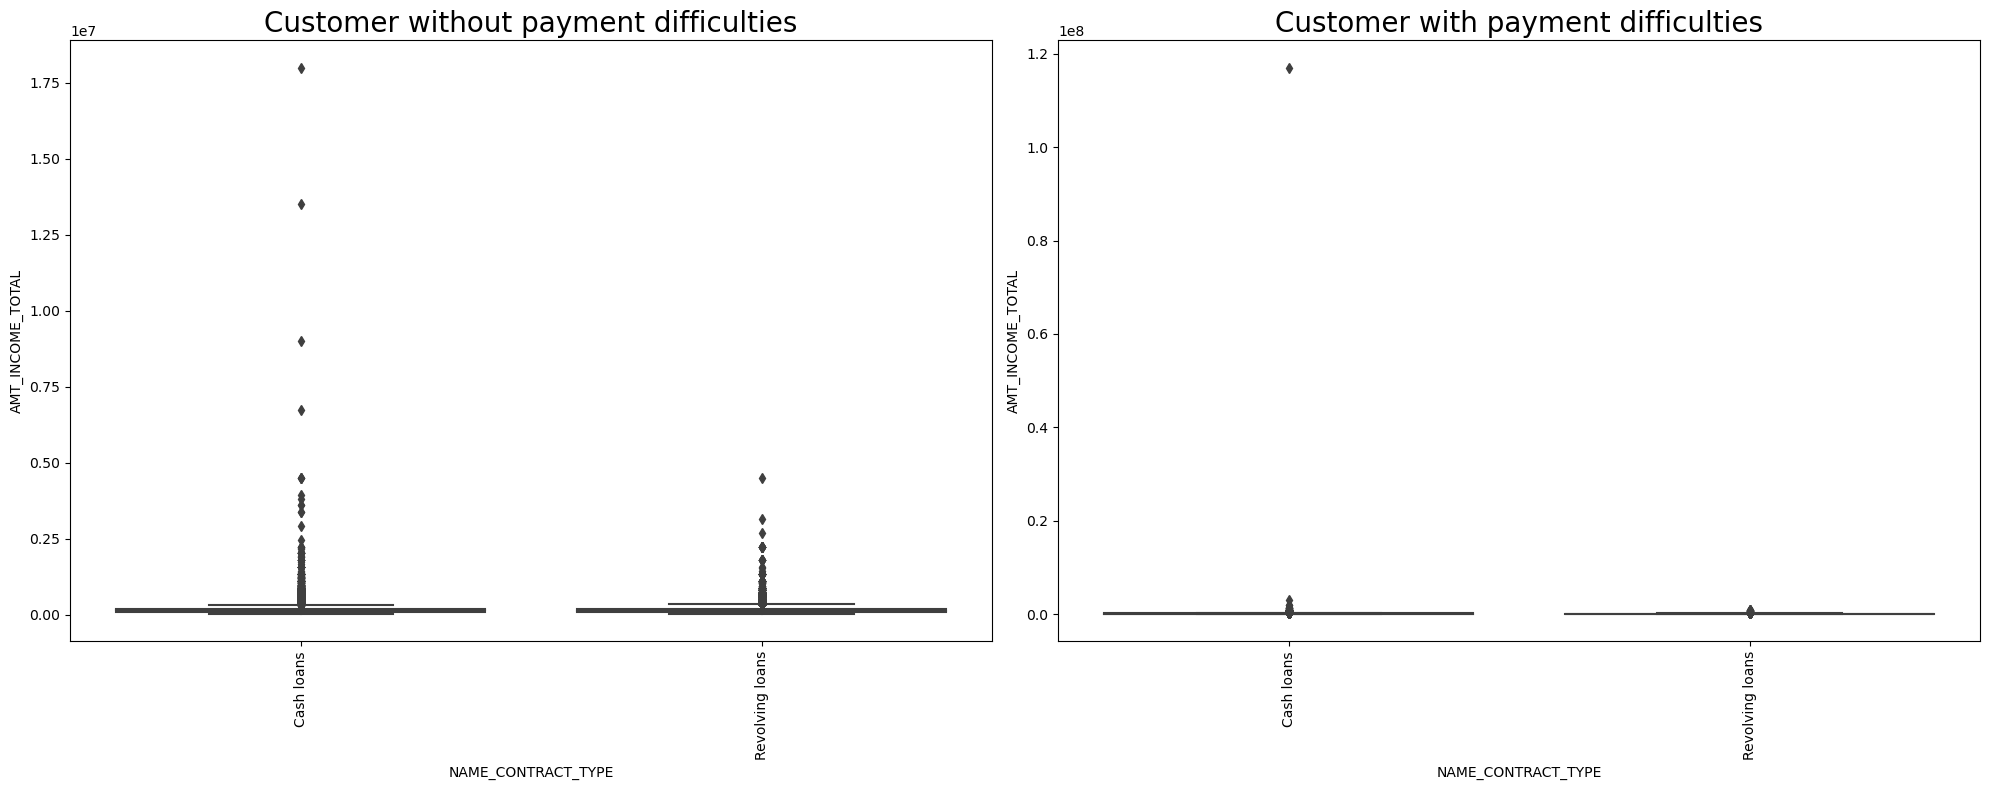

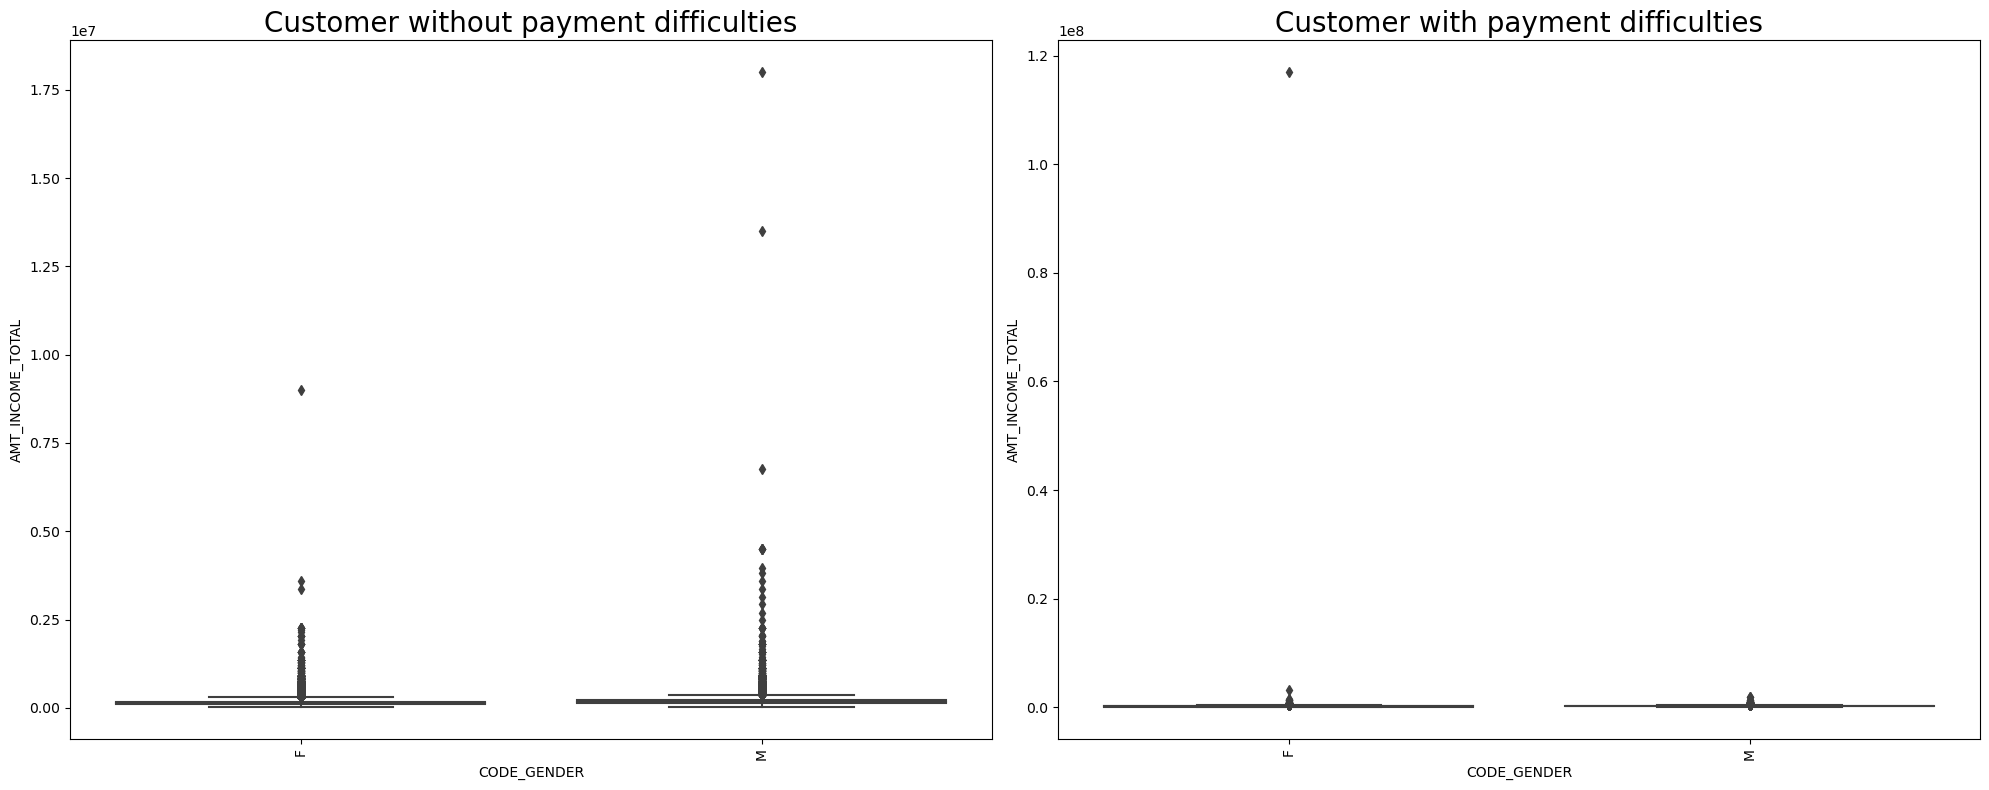

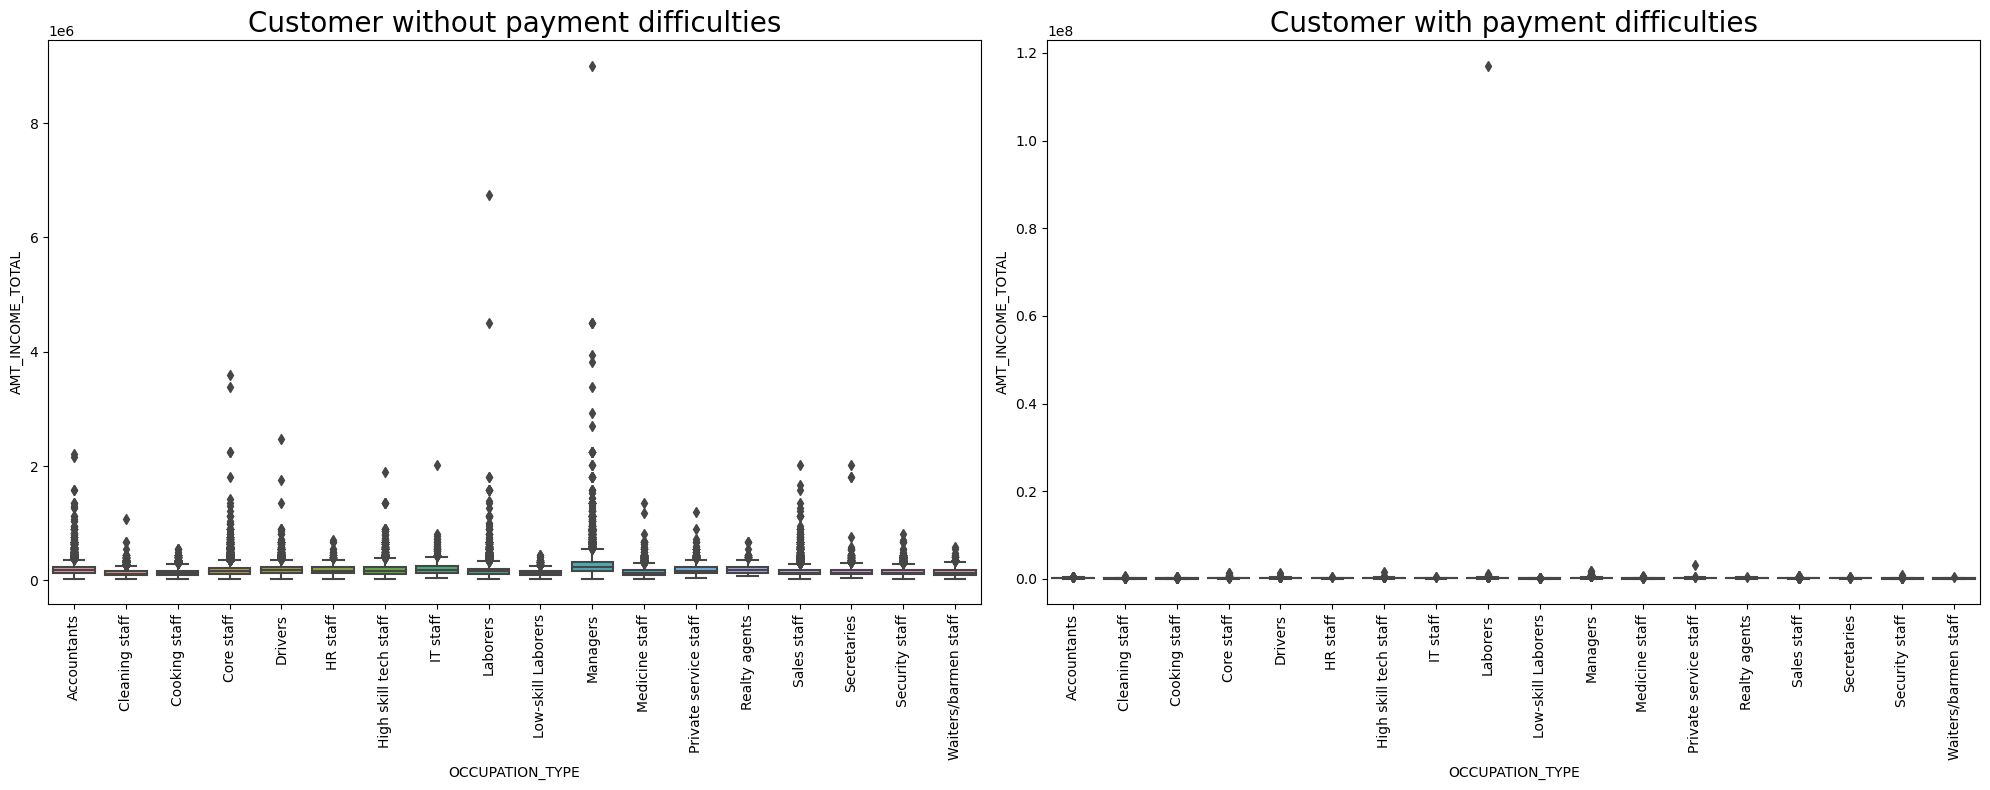

In [126]:
#bivariate analysis with respect to AMT_INCOME_TOTAL 

cols=['NAME_EDUCATION_TYPE','NAME_CONTRACT_TYPE','CODE_GENDER','OCCUPATION_TYPE']

for i in cols:
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    sns.boxplot(data=target_0,y='AMT_INCOME_TOTAL',x=i)
    plt.title('Customer without payment difficulties',size=20)
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.boxplot(data=target_1,y='AMT_INCOME_TOTAL',x=i)
    plt.title('Customer with payment difficulties',size=20)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

-----> insights we get from above box plots.

1. both kind of loan holders are ok they don't have any payment difficulties

2. Got the point that males are more comfortable with no payment difficulties as compare to female because they got more salary as compare to female

3. Observed that customers who have payment difficulties they have very less income in every occupation

4. Observed that who have secondary special , higher education (education type) don't have any payment difficulties.

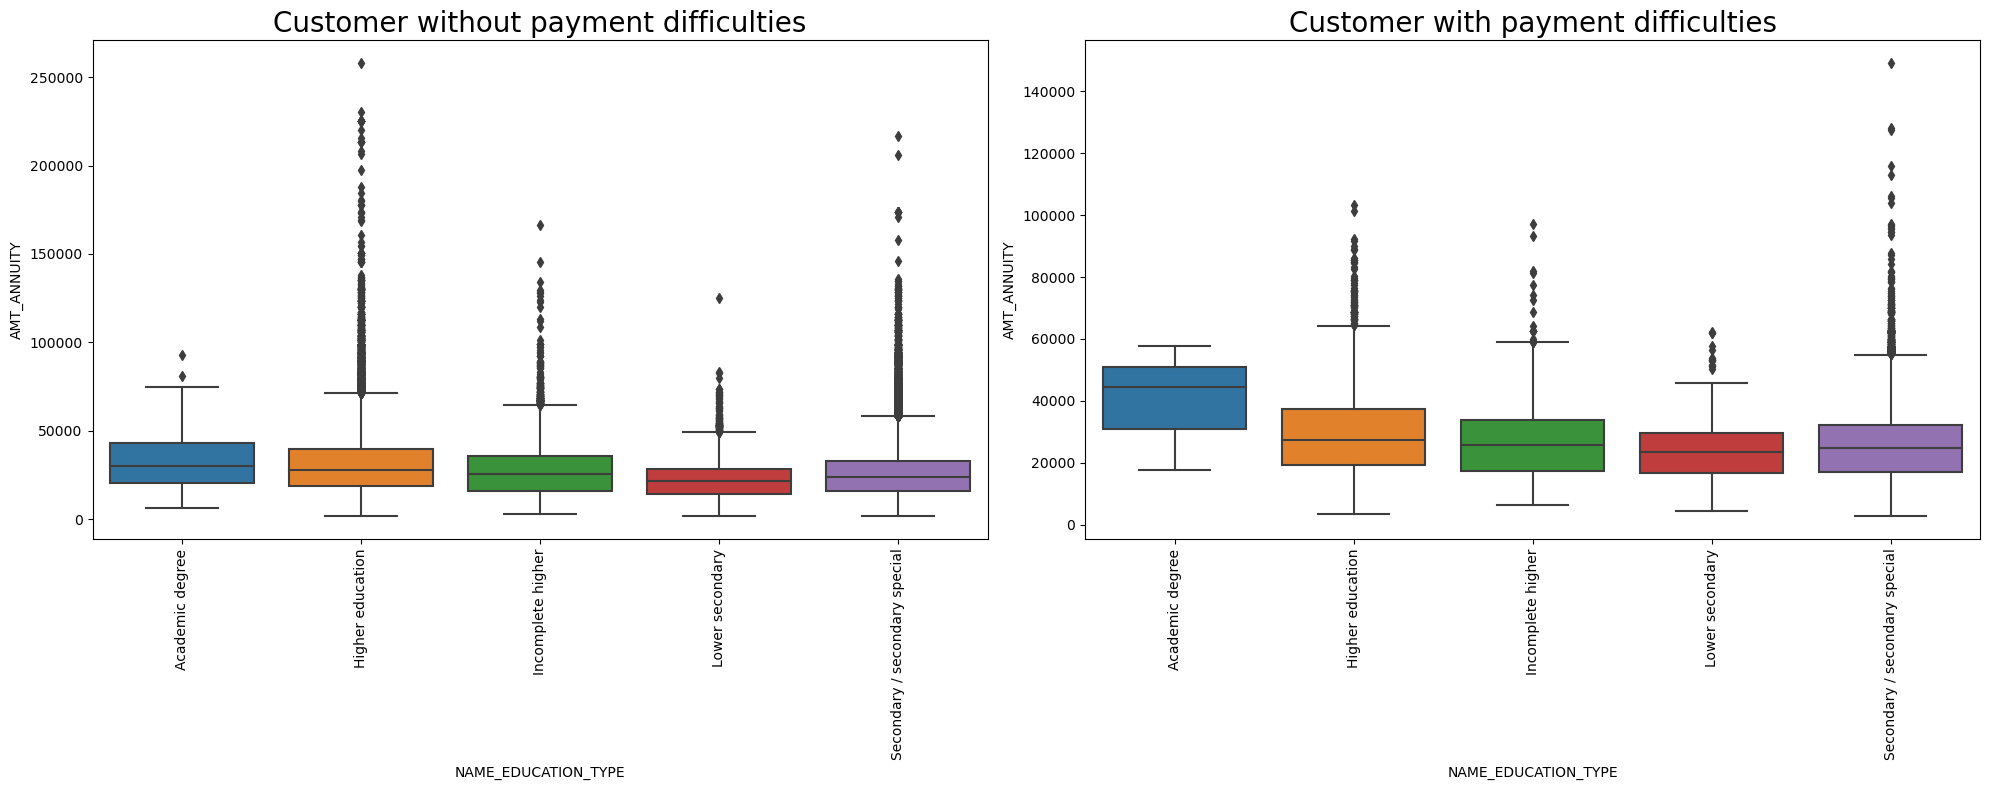

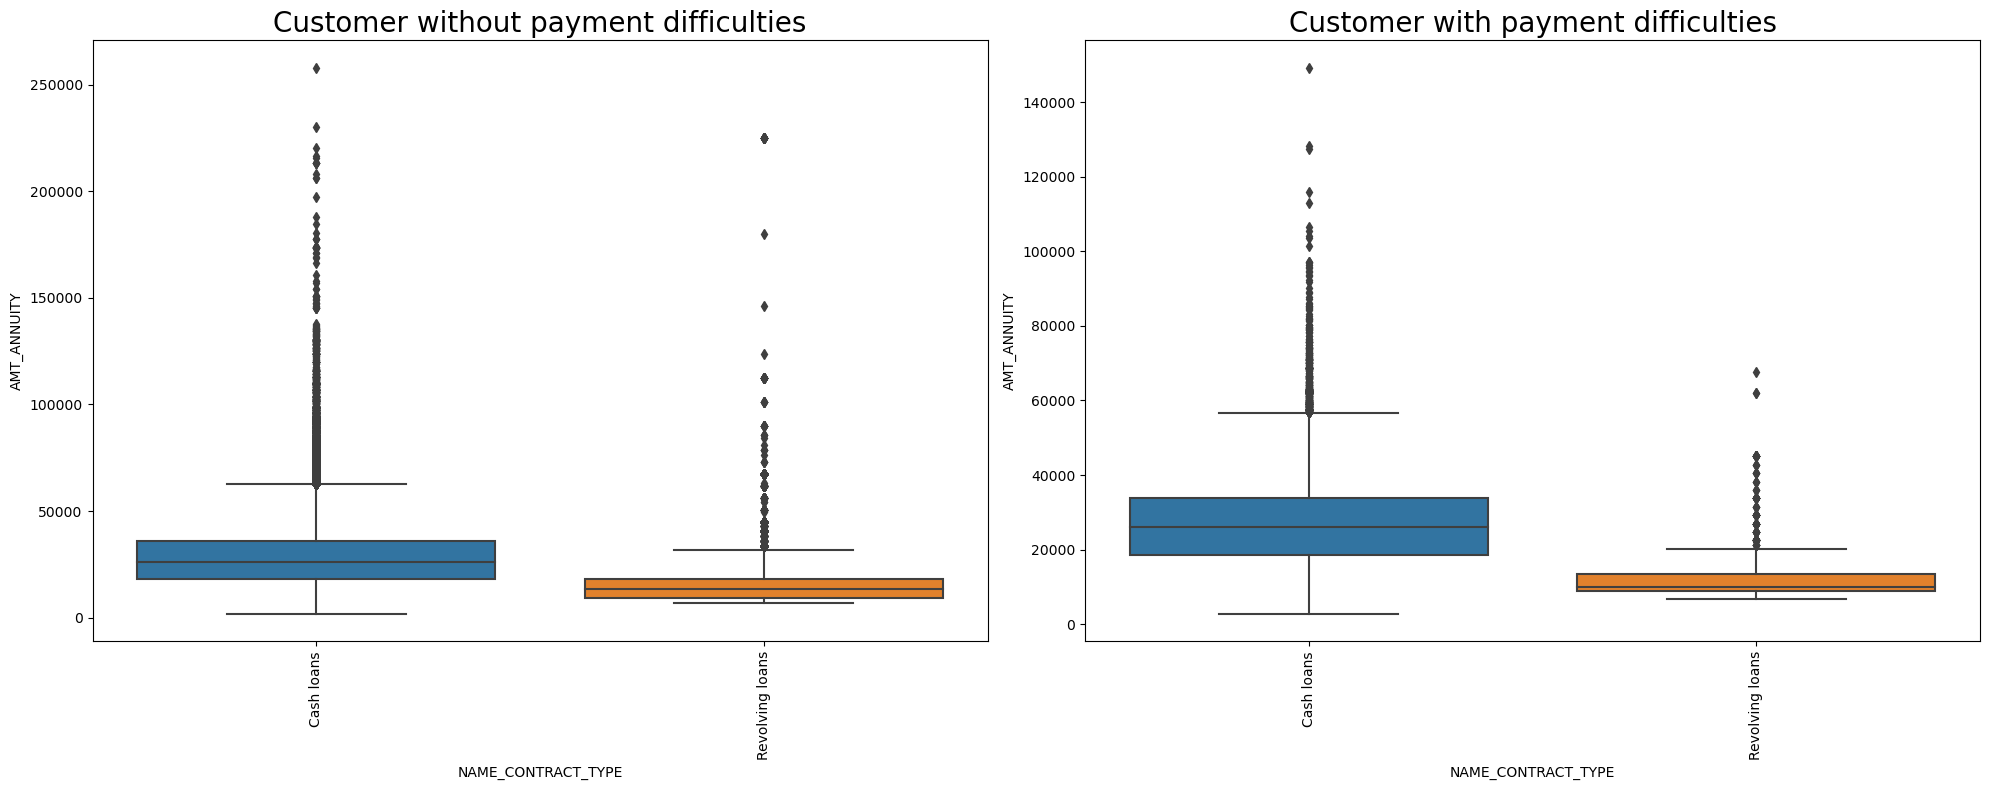

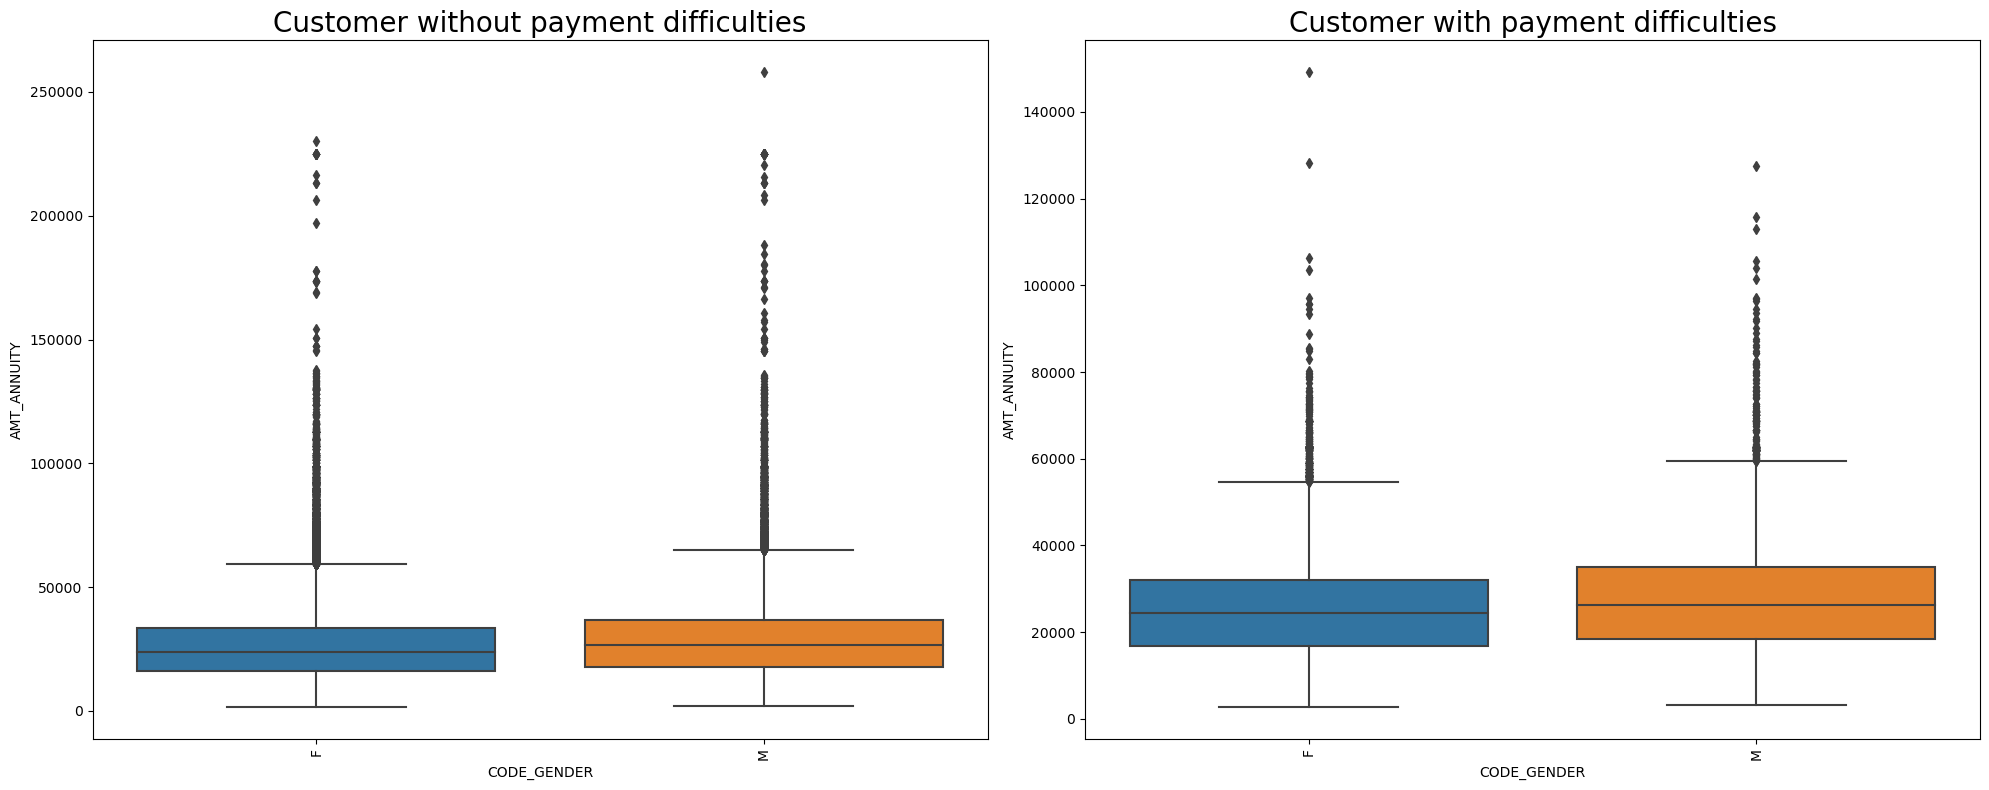

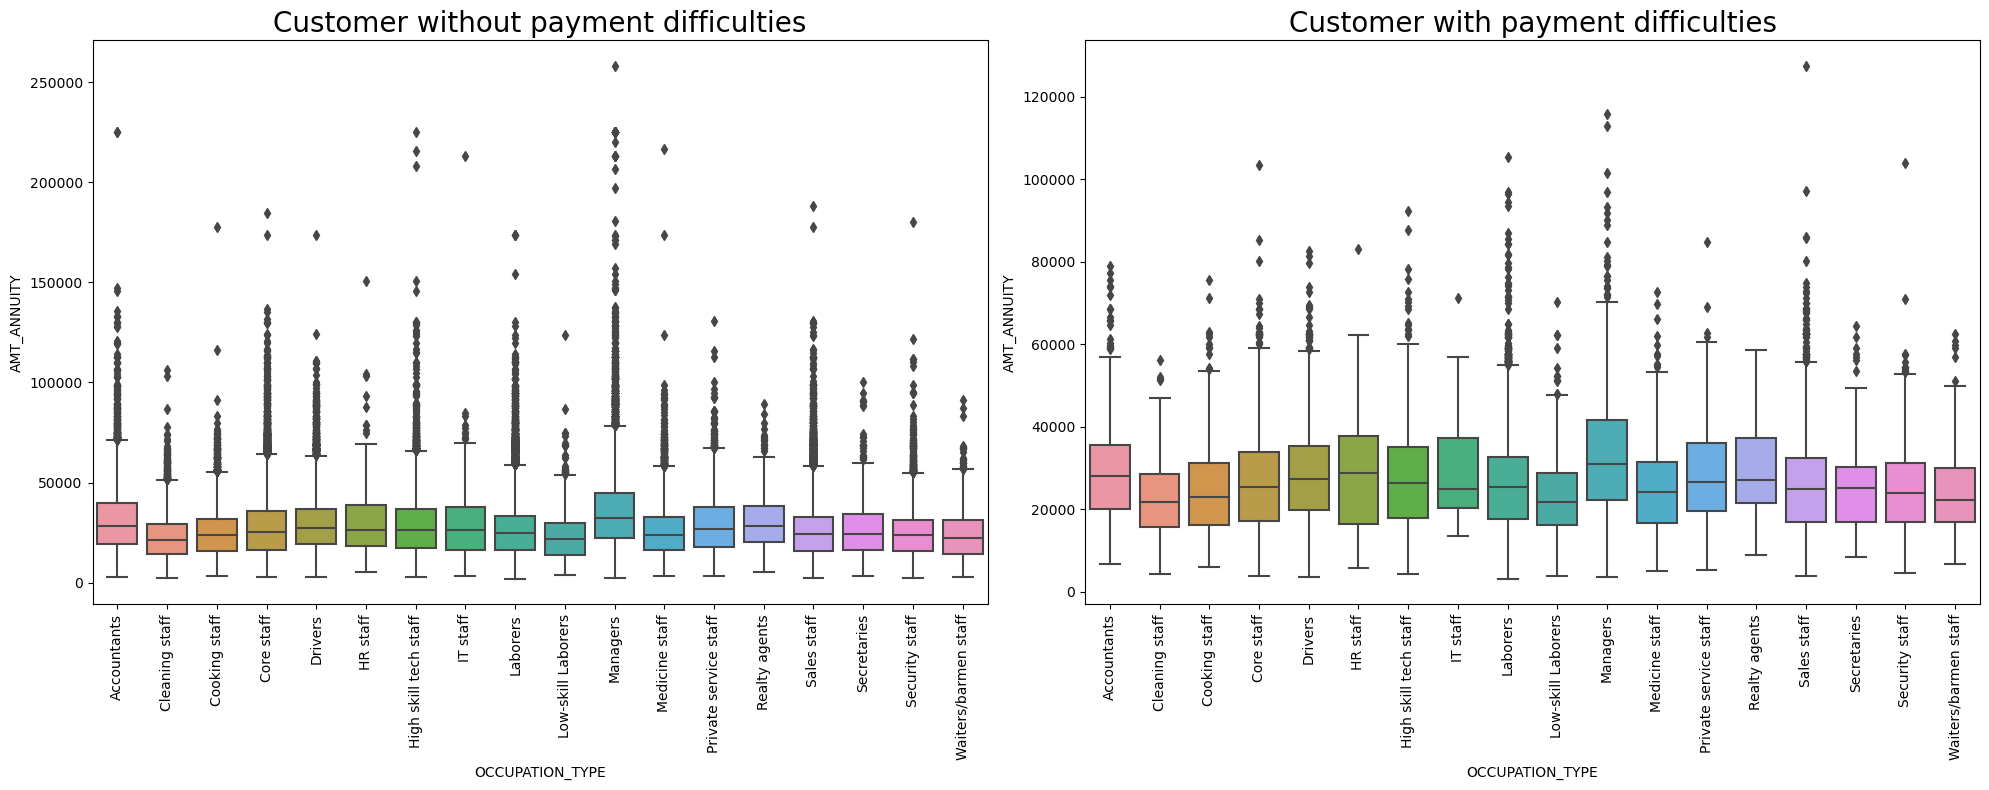

In [127]:
#bivariate analysis with respect to AMT_ANNUITY

cols=['NAME_EDUCATION_TYPE','NAME_CONTRACT_TYPE','CODE_GENDER','OCCUPATION_TYPE']

for i in cols:
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    sns.boxplot(data=target_0,y='AMT_ANNUITY',x=i)
    plt.title('Customer without payment difficulties',size=20)
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.boxplot(data=target_1,y='AMT_ANNUITY',x=i)
    plt.title('Customer with payment difficulties',size=20)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

-----> insights we get from above box plots.

1. Who have annuity more facing payment difficulties

2. cash loan holders are qually distributed in both datasets & have more annuity as compare to revolving holders 

3. male candidates have some more annuity as compare to females.

4. managers have more annuity in both datasets

Finally we have done with application dataset now come to the dataset which have previous records 

# segment 2. previous application data

In [128]:
#reading the previous application DATAFRAME

previous_app_data = pd.read_csv('previous_application.csv')

In [129]:
#display of first 5 records 

previous_app_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [130]:
# checking the shape 

previous_app_data.shape

(1670214, 37)

In [131]:
#checking the info 

previous_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [132]:
#let's describe to see the distributin of numerical data 

previous_app_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [133]:
#checking null values 

previous_app_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [134]:
#calculating the % of null values

null_per = previous_app_data.isnull().sum()*100/len(previous_app_data)

In [135]:
# checkig how many columns have more than 40% missing values 

major_missed_data =null_per[null_per>40]

In [136]:
# display of those columns

major_missed_data

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [137]:
# let us drop those columns.

pre_app_data = previous_app_data.drop(columns=major_missed_data.index)

In [138]:
#after dropping checking the shape

pre_app_data.shape

(1670214, 26)

In [139]:
# now finally going to merge both the datsets 

In [140]:
#checking the shape

new_app_data.shape

(307511, 44)

In [141]:
#checking the shape

pre_app_data.shape

(1670214, 26)

In [142]:
# Merging both the datasets

merged_data = pd.merge(left=new_app_data,right=pre_app_data,on='SK_ID_CURR',how='inner')

In [143]:
#display of new dataset

merged_data

SK_ID_CURR TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0           100002      1           Cash loans           M            N   
1           100003      0           Cash loans           F            N   
2           100003      0           Cash loans           F            N   
3           100003      0           Cash loans           F            N   
4           100004      0      Revolving loans           M            Y   
...            ...    ...                  ...         ...          ...   
1413696     456255      0           Cash loans           F            N   
1413697     456255      0           Cash loans           F            N   
1413698     456255      0           Cash loans           F            N   
1413699     456255      0           Cash loans           F            N   
1413700     456255      0           Cash loans           F            N   

        FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                     Y            0          202500.0      406597.5   
1                     N            0          270000.0     1293502.5   
2                     N            0          270000.0     1293502.5   
3                     N            0          270000.0     1293502.5   
4                     Y            0           67500.0      135000.0   
...                 ...          ...               ...           ...   
1413696               N            0          157500.0      675000.0   
1413697               N            0          157500.0      675000.0   
1413698               N            0          157500.0      675000.0   
1413699               N            0          157500.0      675000.0   
1413700               N            0          157500.0      675000.0   

         AMT_ANNUITY_x  ...  NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY  \
0              24700.5  ...               New              Vehicles   
1              35698.5  ...          Repeater                   XNA   
2              35698.5  ...         Refreshed             Furniture   
3              35698.5  ...         Refreshed  Consumer Electronics   
4               6750.0  ...               New                Mobile   
...                ...  ...               ...                   ...   
1413696        49117.5  ...          Repeater                   XNA   
1413697        49117.5  ...          Repeater                   XNA   
1413698        49117.5  ...          Repeater                   XNA   
1413699        49117.5  ...          Repeater                   XNA   
1413700        49117.5  ...          Repeater             Computers   

        NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  \
0                  POS               XNA                    Stone   
1                 Cash            x-sell  Credit and cash offices   
2                  POS               XNA                    Stone   
3                  POS               XNA             Country-wide   
4                  POS               XNA         Regional / Local   
...                ...               ...                      ...   
1413696           Cash            x-sell  Credit and cash offices   
1413697          Cards           walk-in             Country-wide   
1413698           Cash           walk-in  Credit and cash offices   
1413699           Cash            x-sell          AP+ (Cash loan)   
1413700            POS               XNA             Country-wide   

        SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
0                    500       Auto technology         24.0        low_normal   
1                     -1                   XNA         12.0        low_normal   
2                   1400             Furniture          6.0            middle   
3                    200  Consumer electronics         12.0            middle   
4                     30          Connectivity          4.0            middle   
...                  ...                   ...          ...               

In [144]:
#display of first 5 rows

merged_data.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0     100002      1           Cash loans           M            N   
1     100003      0           Cash loans           F            N   
2     100003      0           Cash loans           F            N   
3     100003      0           Cash loans           F            N   
4     100004      0      Revolving loans           M            Y   

  FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0               Y            0          202500.0      406597.5        24700.5   
1               N            0          270000.0     1293502.5        35698.5   
2               N            0          270000.0     1293502.5        35698.5   
3               N            0          270000.0     1293502.5        35698.5   
4               Y            0           67500.0      135000.0         6750.0   

   ...  NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0  ...               New              Vehicles            POS   
1  ...          Repeater                   XNA           Cash   
2  ...         Refreshed             Furniture            POS   
3  ...         Refreshed  Consumer Electronics            POS   
4  ...               New                Mobile            POS   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE SELLERPLACE_AREA  \
0               XNA                    Stone              500   
1            x-sell  Credit and cash offices               -1   
2               XNA                    Stone             1400   
3               XNA             Country-wide              200   
4               XNA         Regional / Local               30   

   NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
0       Auto technology         24.0        low_normal   
1                   XNA         12.0        low_normal   
2             Furniture          6.0            middle   
3  Consumer electronics         12.0            middle   
4          Connectivity          4.0            middle   

           PRODUCT_COMBINATION  
0      POS other with interest  
1             Cash X-Sell: low  
2   POS industry with interest  
3  POS household with interest  
4  POS mobile without interest  

[5 rows x 69 columns]

In [145]:
#checking column names

merged_data.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'WEEKDAY_APPR_PROCESS_START_x',
 'HOUR_APPR_PROCESS_START_x',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_INC_RANGE',


In [146]:
#checking datatypes

merged_data.dtypes

SK_ID_CURR                object
TARGET                  category
NAME_CONTRACT_TYPE_x    category
CODE_GENDER             category
FLAG_OWN_CAR            category
                          ...   
SELLERPLACE_AREA           int64
NAME_SELLER_INDUSTRY      object
CNT_PAYMENT              float64
NAME_YIELD_GROUP          object
PRODUCT_COMBINATION       object
Length: 69, dtype: object

In [147]:
#checking info

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 69 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1413701 non-null  object  
 1   TARGET                        1413701 non-null  category
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  category
 3   CODE_GENDER                   1413701 non-null  category
 4   FLAG_OWN_CAR                  1413701 non-null  category
 5   FLAG_OWN_REALTY               1413701 non-null  category
 6   CNT_CHILDREN                  1413701 non-null  category
 7   AMT_INCOME_TOTAL              1413701 non-null  float64 
 8   AMT_CREDIT_x                  1413701 non-null  float64 
 9   AMT_ANNUITY_x                 1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x             1412493 non-null  float64 
 11  NAME_TYPE_SUITE               1410175 non-null  category
 12  NAME_INCOME_TY

IN this new dataset we have target column named 'NAME_CONTRACT_STATUS' so will find value-counts of it to get insights of the distribution

In [148]:
#checking value_counts

merged_data['NAME_CONTRACT_STATUS'].value_counts()

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

In [149]:
#calculating % of the value counts

merged_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True)

Approved        0.626794
Canceled        0.183519
Refused         0.173580
Unused offer    0.016107
Name: NAME_CONTRACT_STATUS, dtype: float64

Will plot a graphic representation to show which category have more in it

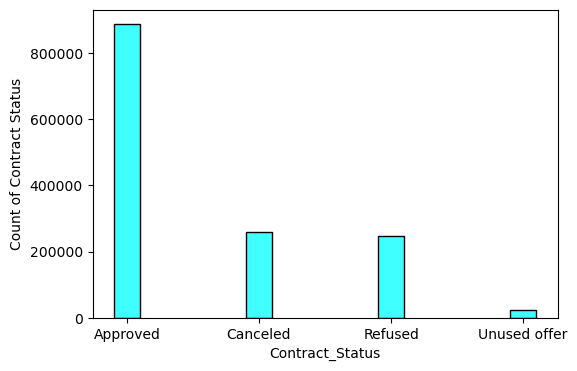

In [150]:
# plotting a chart in target('NAME_CONTRACT_STATUS')column 

plt.figure(figsize=(6,4))
sns.histplot(merged_data['NAME_CONTRACT_STATUS'],color='cyan',shrink=0.2)
plt.xlabel('Contract_Status')
plt.ylabel('Count of Contract Status')
plt.show()

Now will create different datasets for each category and then will analyse category wise.

In [151]:
approved_data = merged_data[merged_data['NAME_CONTRACT_STATUS']=='Approved']
canceled_data = merged_data[merged_data['NAME_CONTRACT_STATUS']=='Canceled']
refused_data = merged_data[merged_data['NAME_CONTRACT_STATUS']=='Refused']
unused_data = merged_data[merged_data['NAME_CONTRACT_STATUS']=='Unused offer']

In [152]:
# checking info

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 69 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1413701 non-null  object  
 1   TARGET                        1413701 non-null  category
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  category
 3   CODE_GENDER                   1413701 non-null  category
 4   FLAG_OWN_CAR                  1413701 non-null  category
 5   FLAG_OWN_REALTY               1413701 non-null  category
 6   CNT_CHILDREN                  1413701 non-null  category
 7   AMT_INCOME_TOTAL              1413701 non-null  float64 
 8   AMT_CREDIT_x                  1413701 non-null  float64 
 9   AMT_ANNUITY_x                 1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x             1412493 non-null  float64 
 11  NAME_TYPE_SUITE               1410175 non-null  category
 12  NAME_INCOME_TY

In [153]:
# univariate analysis on categorical variables.

In [154]:
# let's make a list of columns of categorical variables.

col_lists = ['NAME_CONTRACT_TYPE_y','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','NAME_CLIENT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','NAME_YIELD_GROUP','PRODUCT_COMBINATION','NAME_SELLER_INDUSTRY','CHANNEL_TYPE']

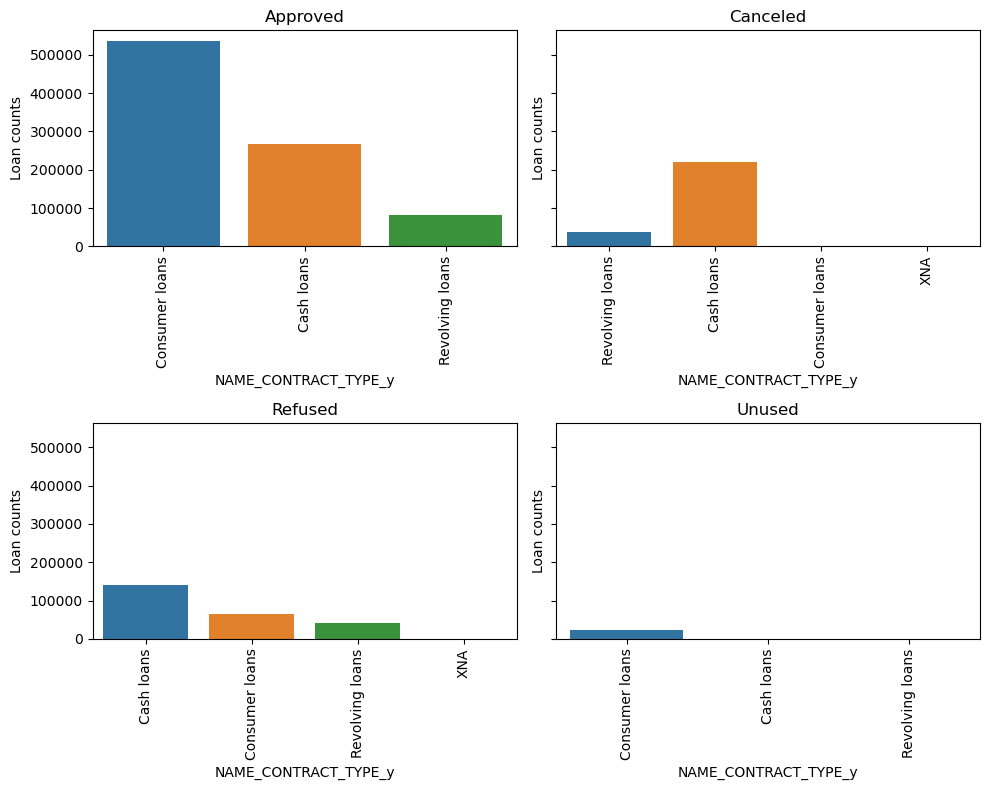

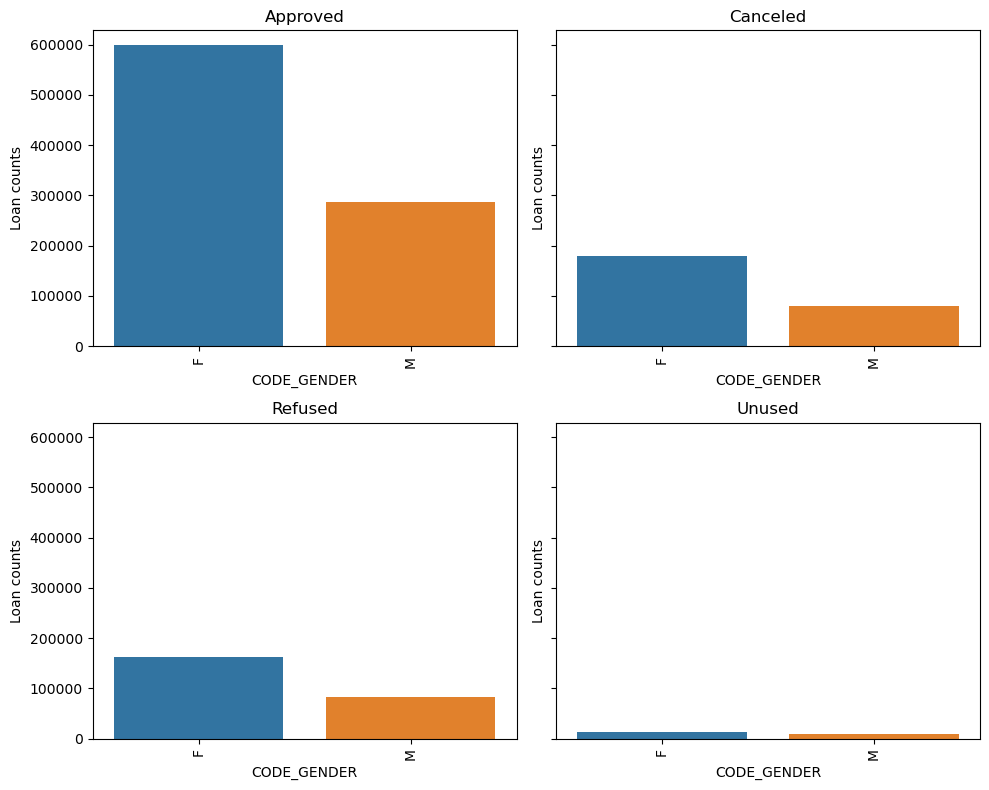

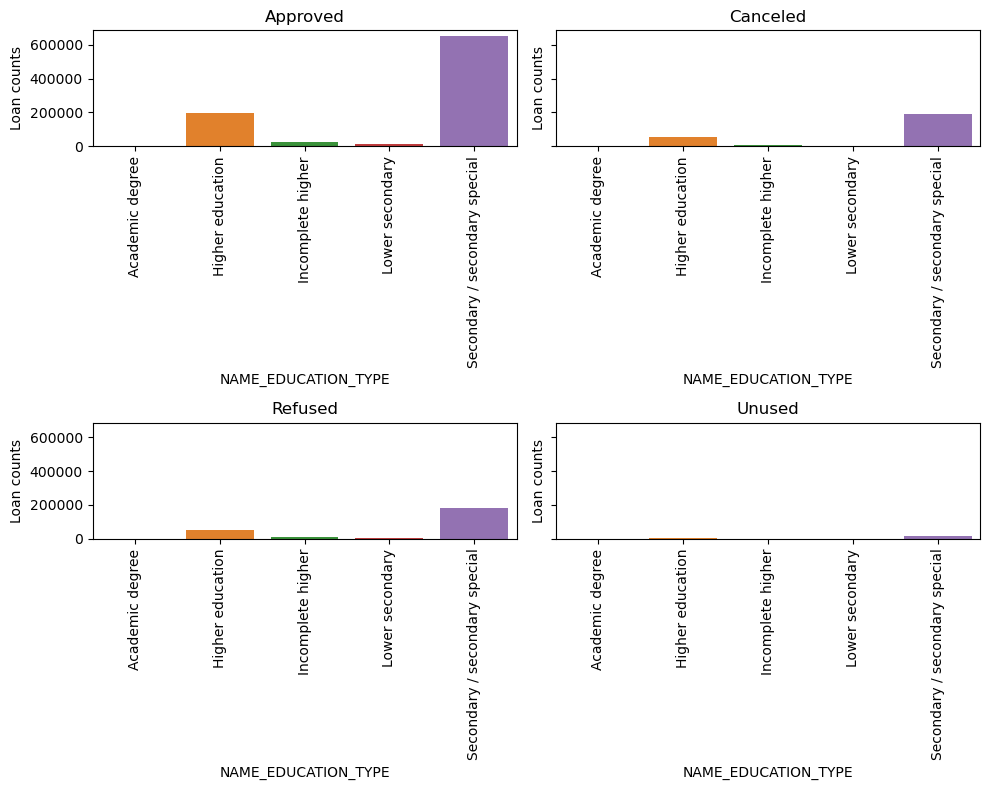

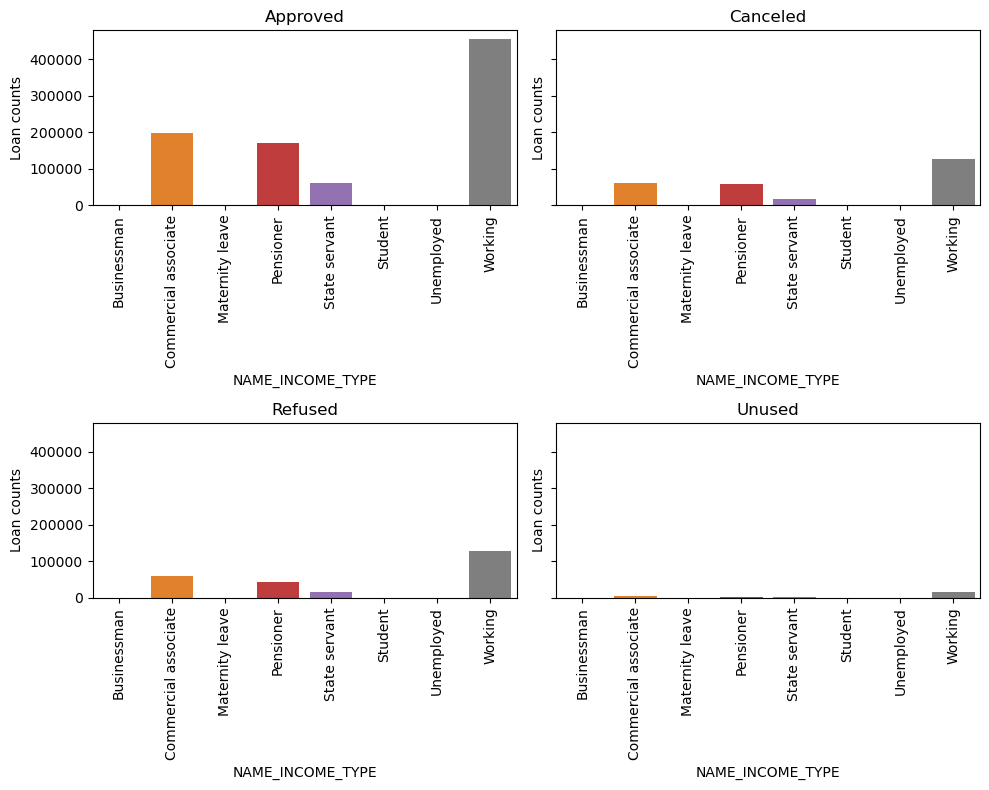

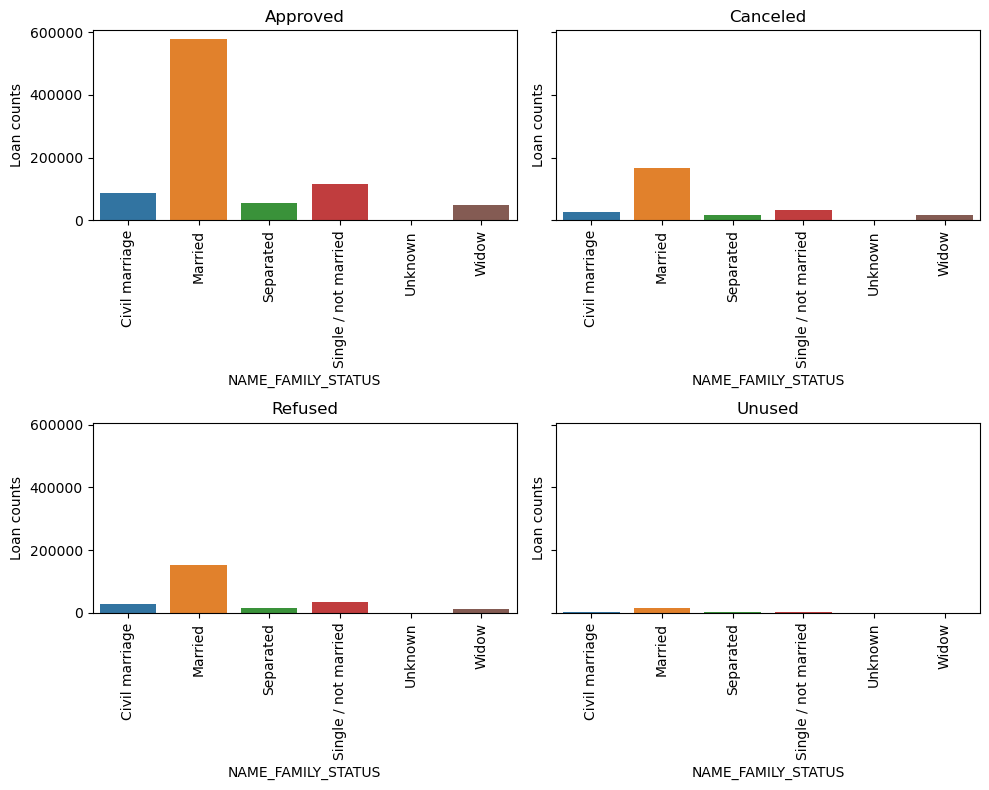

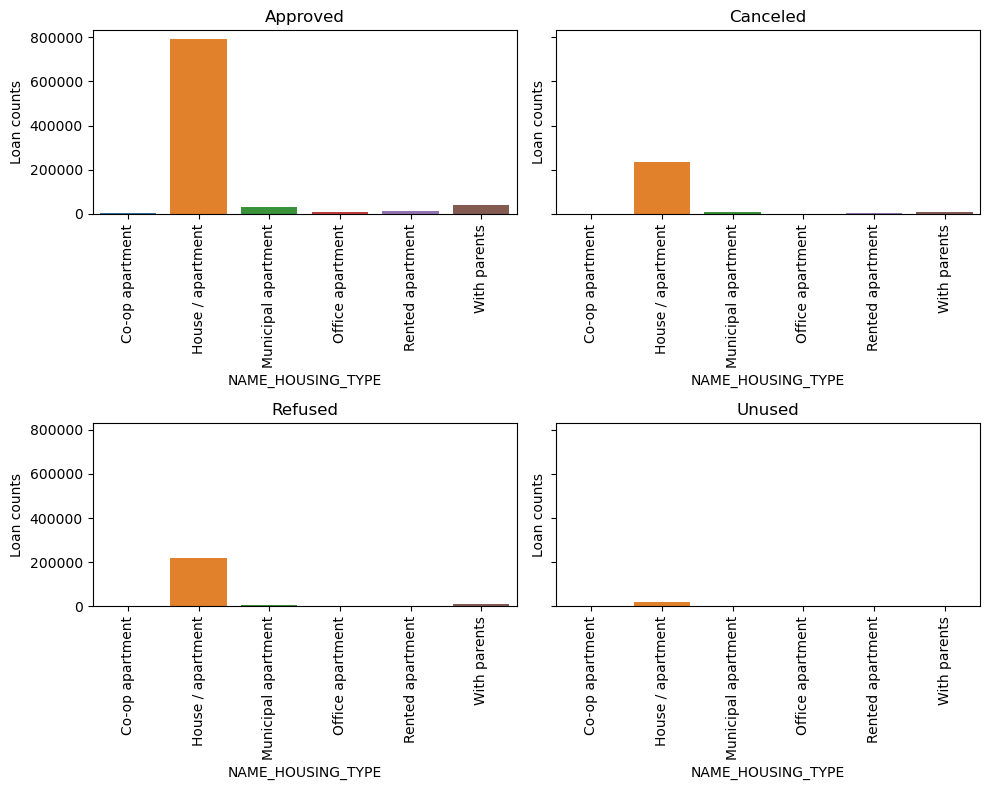

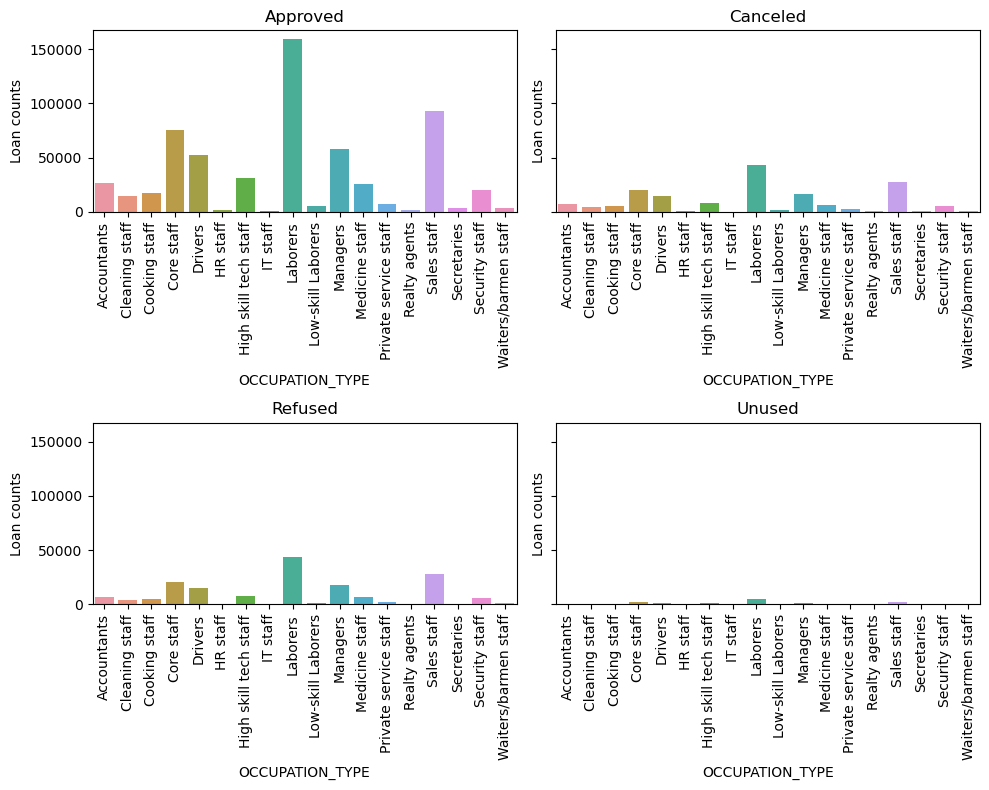

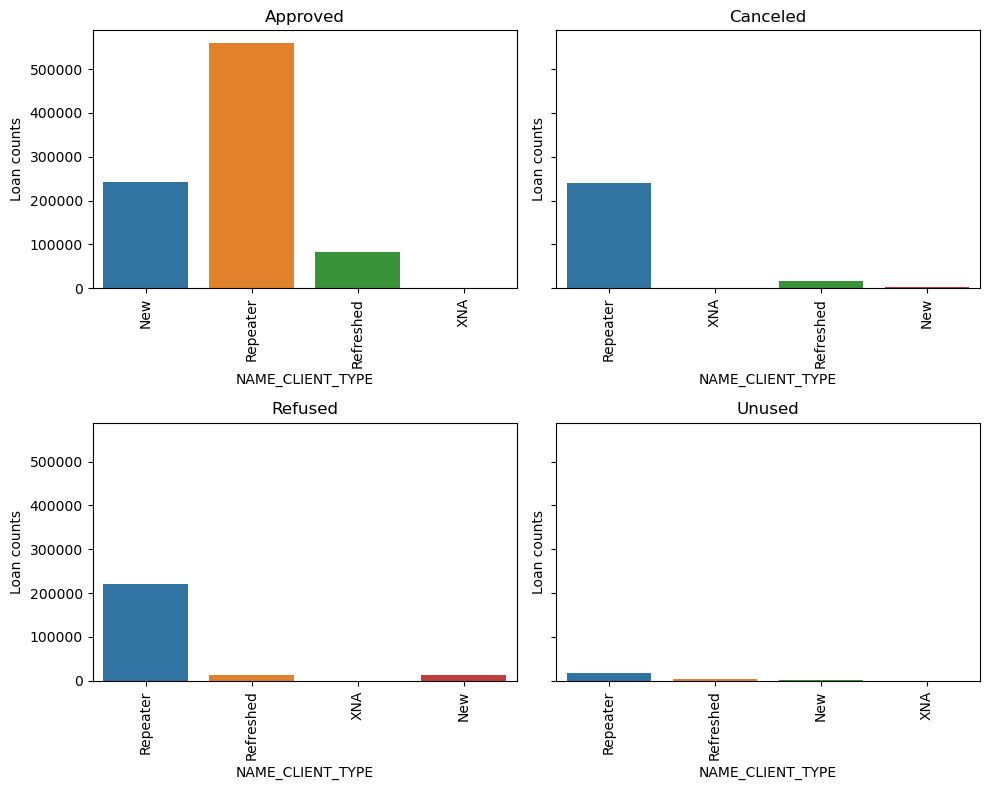

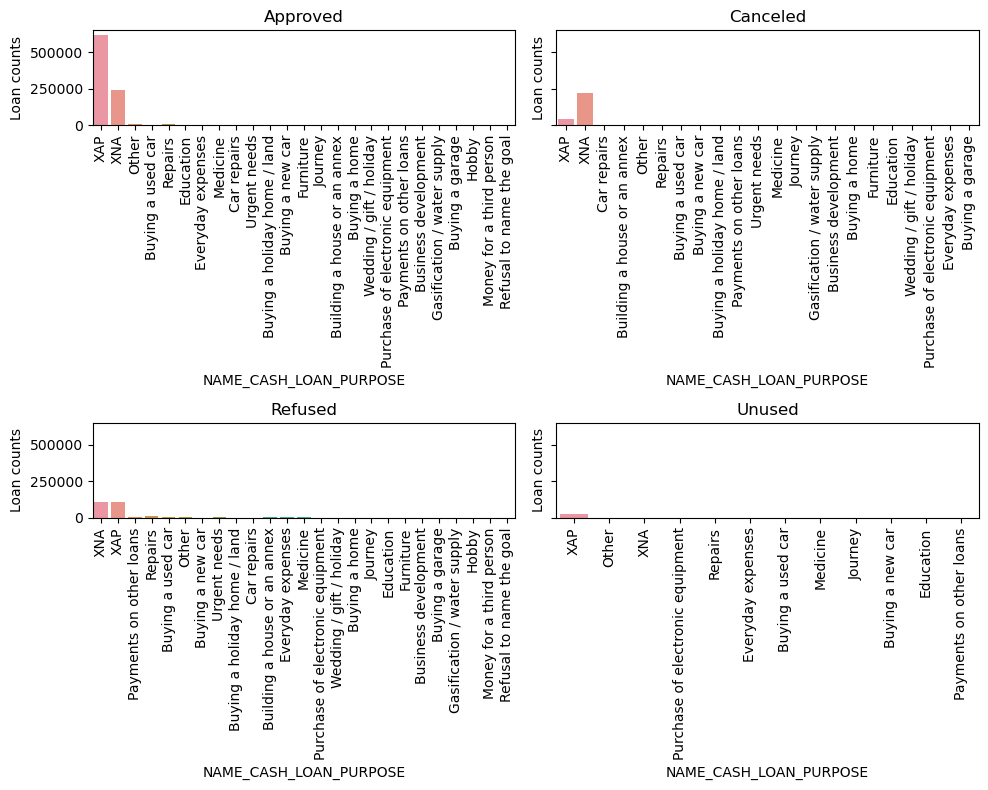

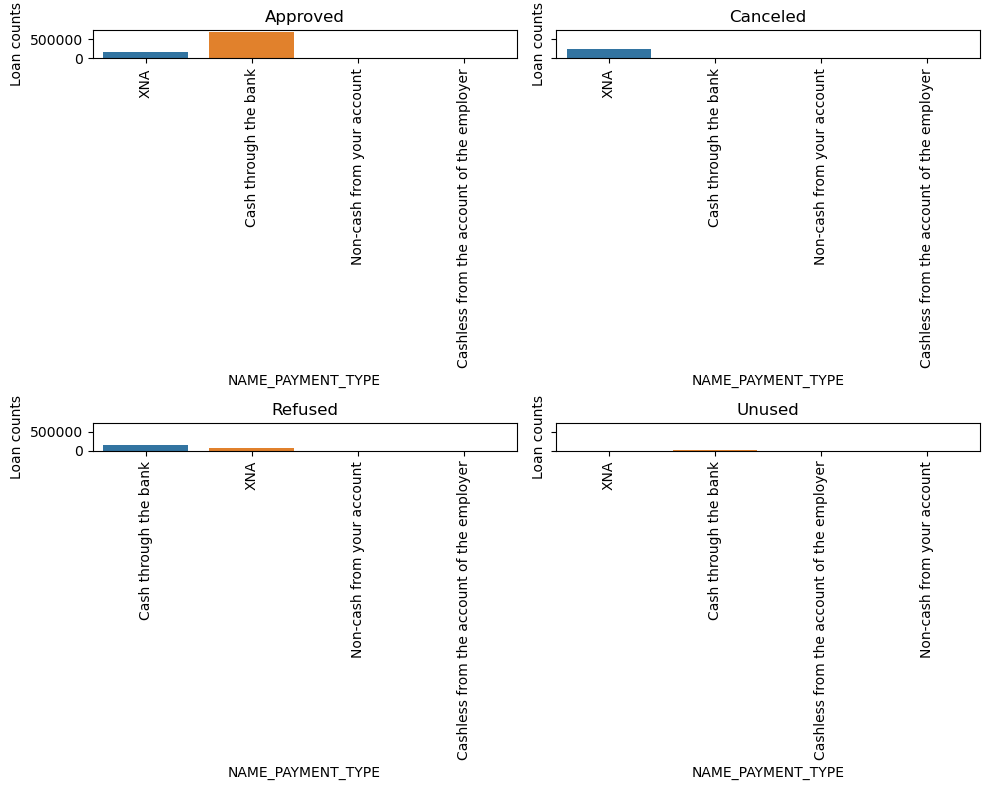

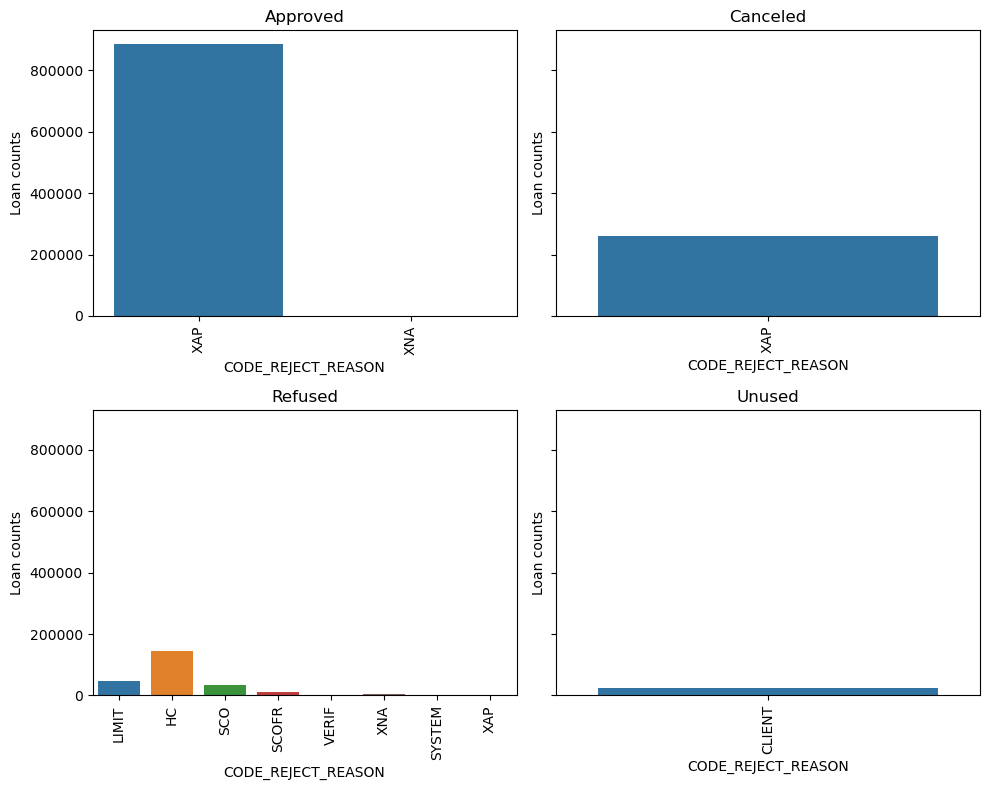

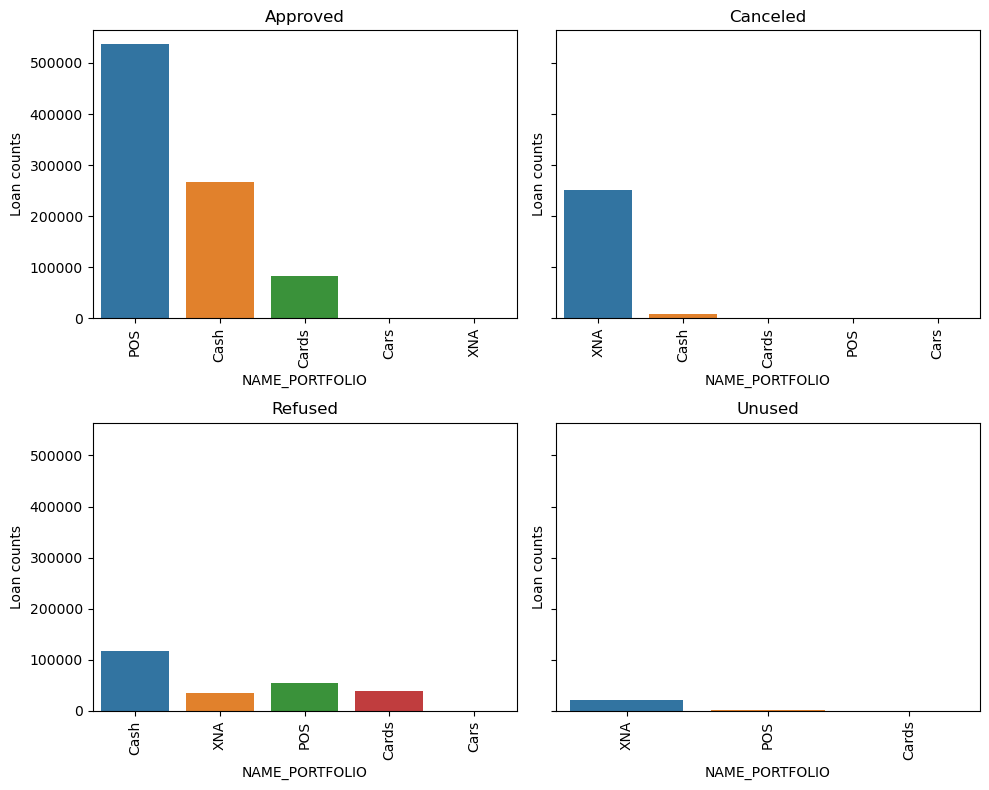

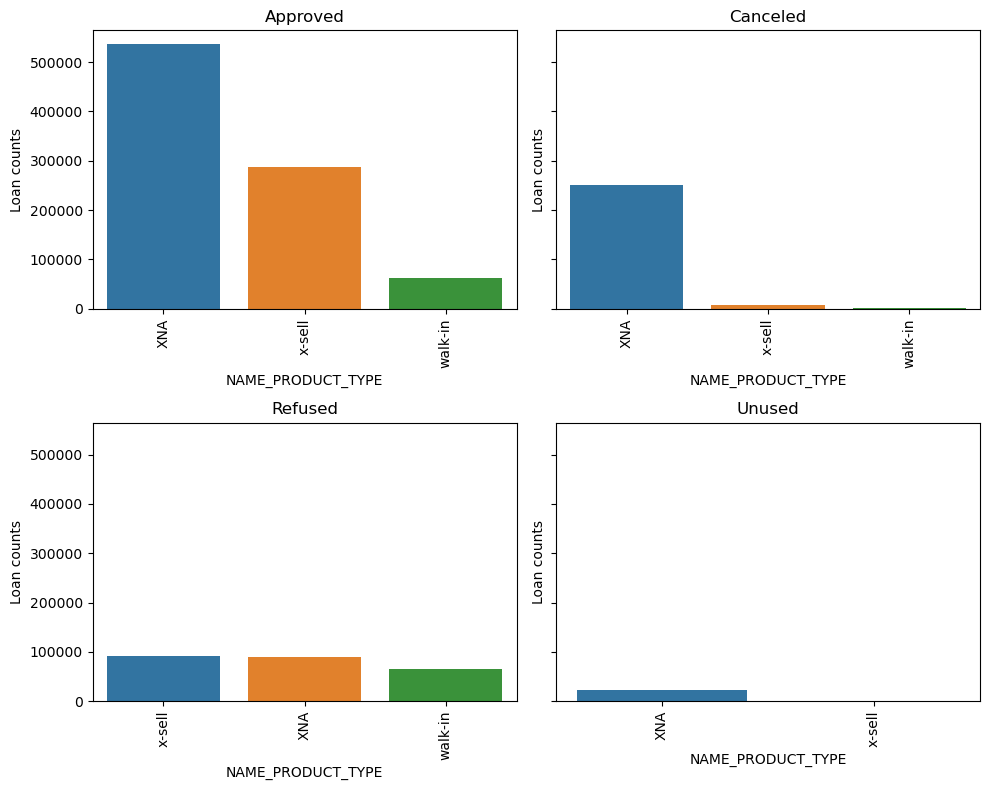

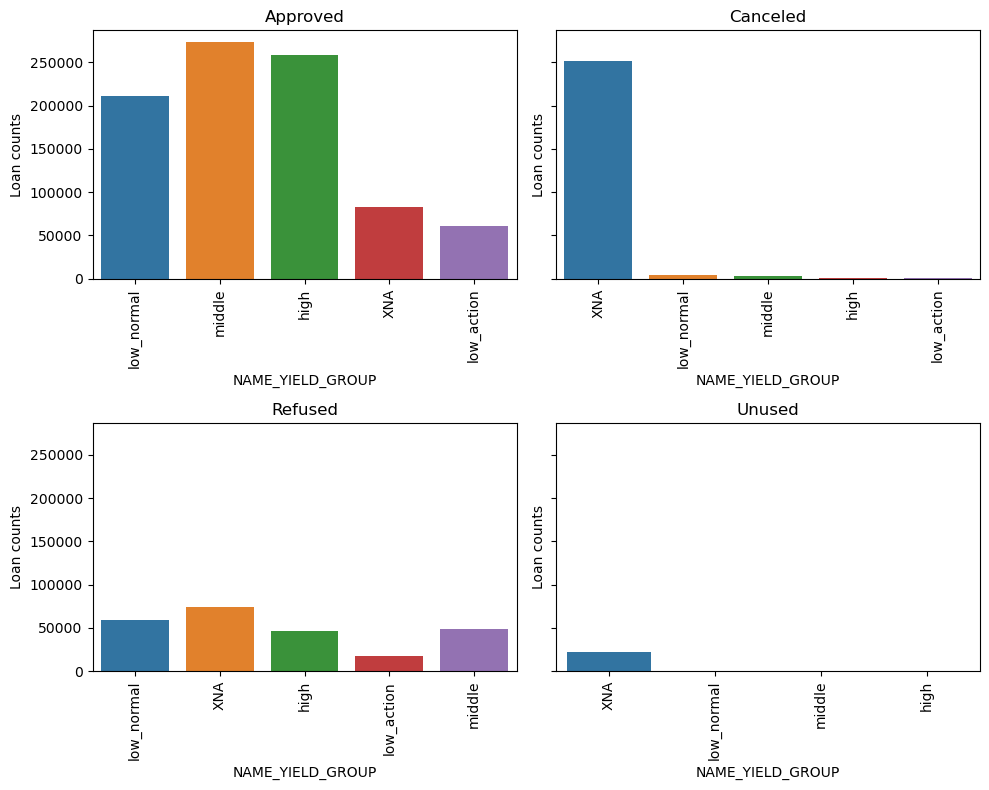

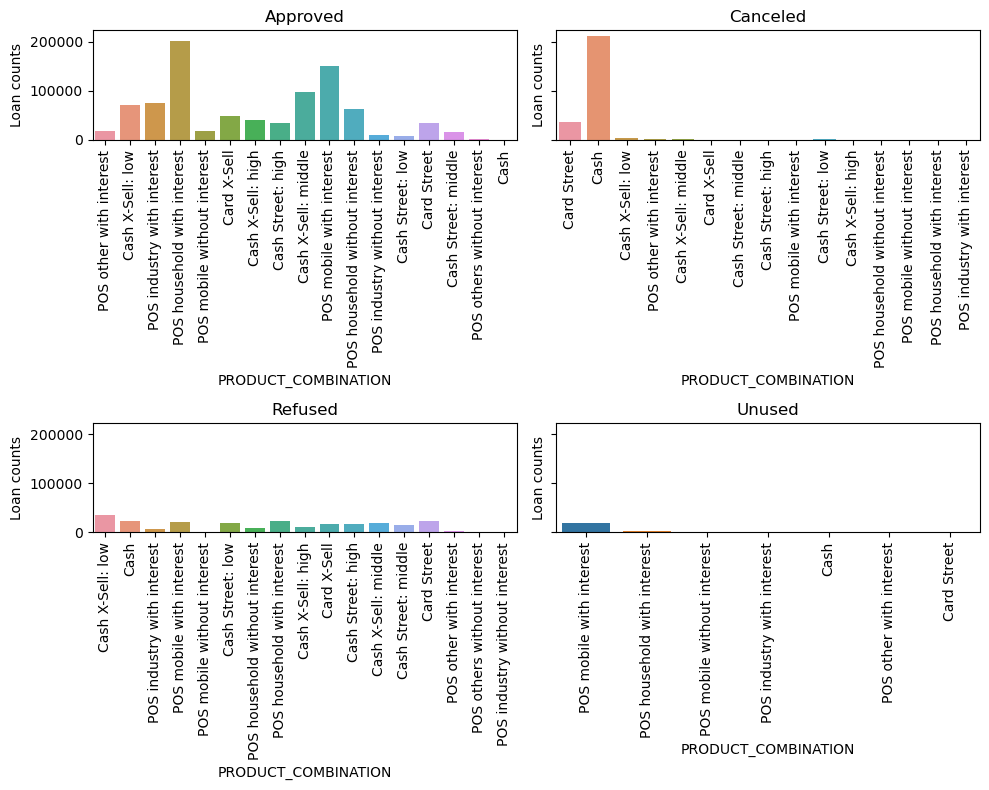

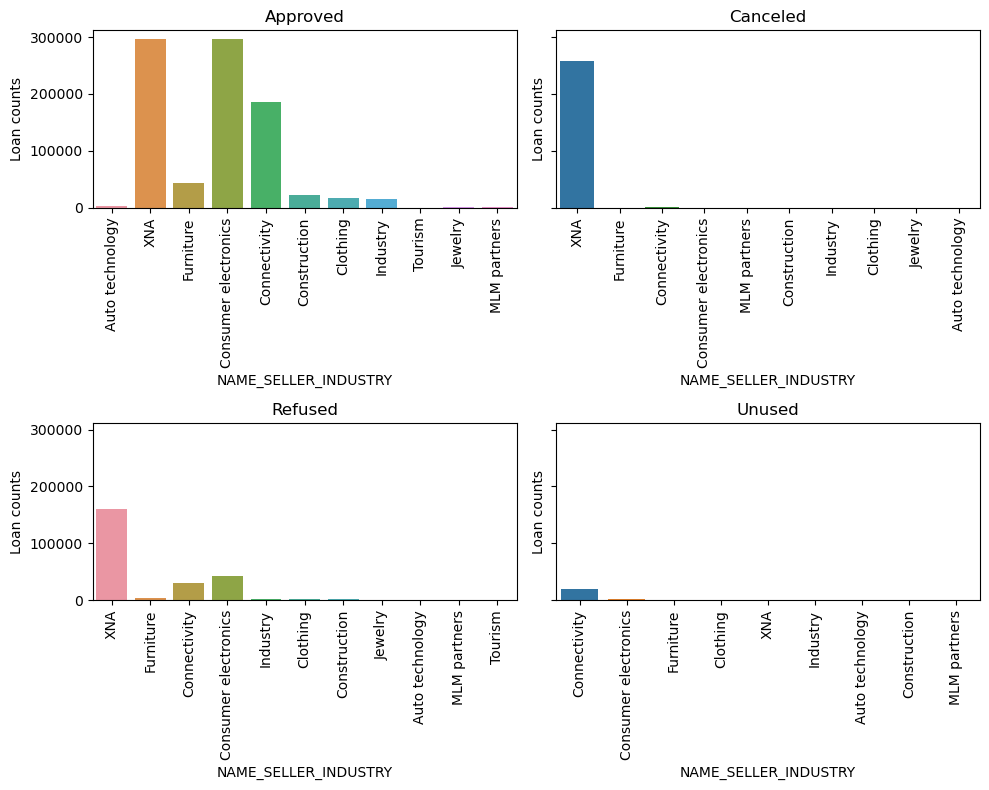

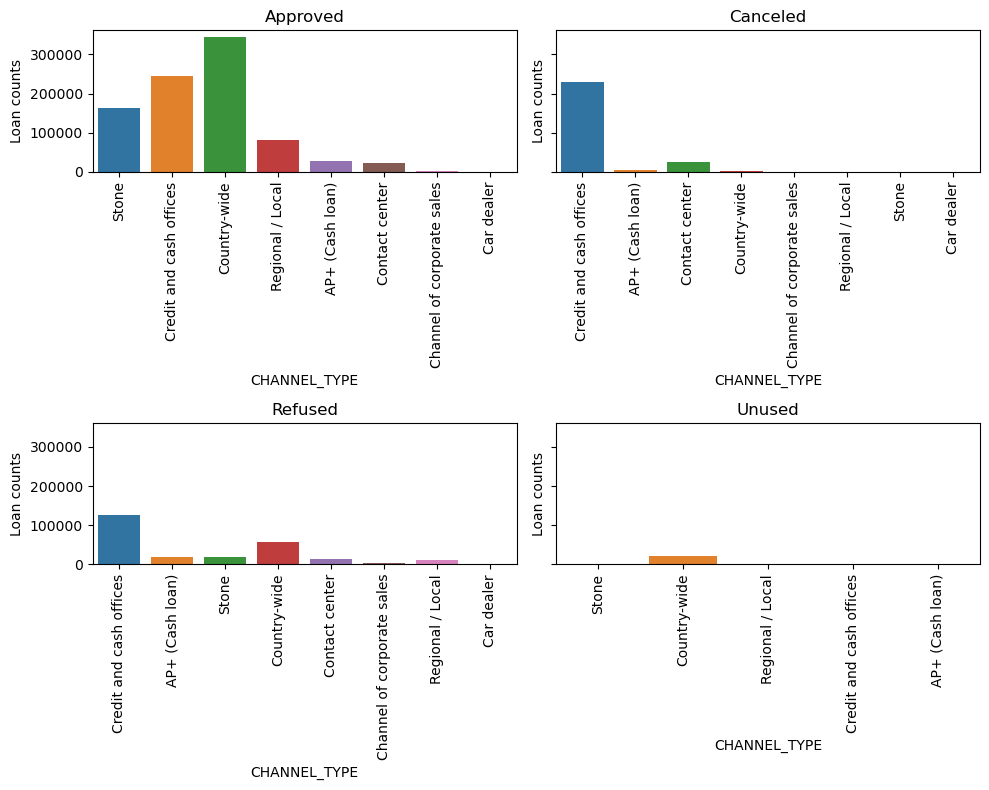

In [155]:
# will write a def function to plot a graph at one time for all variables

def plotting_variable(i):
    
    fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(ncols=2,nrows=2,sharey=True,figsize=(10,8))
    fig.tight_layout(pad=10.0)
    
    ax1 = sns.countplot(ax=ax1,data=approved_data,x=i)
    ax1.set_title("Approved")
    ax1.set_ylabel("Loan counts")
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
    
    ax2 = sns.countplot(ax=ax2,data=canceled_data,x=i)
    ax2.set_title("Canceled")
    ax2.set_ylabel("Loan counts")
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
     
    ax3= sns.countplot(ax=ax3,data=refused_data,x=i)
    ax3.set_title("Refused")
    ax3.set_ylabel("Loan counts")
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)
    
    
    ax4= sns.countplot(ax=ax4,data=unused_data,x=i)
    ax4.set_title("Unused")
    ax4.set_ylabel("Loan counts")
    ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
    
    plt.tight_layout()
    plt.show()
    
for i in  col_lists:
    plotting_variable(i)    

---> Insight we get from here

1.Most approved loan is consumer loan & most refused loan is cash loan.

2.As compare to male candidates , female got more loan.

3.Who have secondary/special education got more approved loans.

4.Who are working their application got more approved as compare to others.

5.Married once have more approved loan.

6.Those who have their own house/apartment got approved loan.

7.Labourers have more approved loan as compare to others.

8.Repeaters have more chances to get loan s compare to others.

9.Electronics industry relavent have higher chances to get loan.

10.Middle & high yield group have got more loan (approved).